In [1]:
import warnings
warnings.simplefilter('ignore')

# 분류의 기초

분류(classification)는 독립 변수(feature) 값이 주어졌을 때 그 독립 변수 값과 가장 연관성이 큰 종속변수 카테고리(클래스)를 계산하는 문제이다. 현실적인 문제로 바꾸어 말하면 어떤 표본에 대한 데이터가 주어졌을 때 그 표본이 어떤 카테고리 혹은 클래스에 속하는지를 알아내는 문제이기도 하다. 선택해야 할 카테고리 혹은 클래스가 미리 주어졌다는 점에서 보기가 주어진 객관식 시험 문제를 푸는 것과 비슷하다고 말할 수 있다.

## 분류 모형의 종류

분류 문제를 푸는 방법은 크게 두 가지로 나눌 수 있다. 하나는 주어진 데이터를 카테고리에 따라 서로 다른 영역으로 나누는 경계면(decision boundary)을 찾아낸 다음 이 경계면으로부터 주어진 데이터가 어느 위치에 있는지를 계산하는 판별 함수(discriminant function)를 이용하는 **판별함수 모형**이고 또 다른 하나는 주어진 데이터에 대해(conditionally) 각 카테고리 혹은 클래스가 정답일 조건부 확률(conditional probability)를 계산하는 **조건부 확률 모형**이다. 조건부 확률 기반 방법은 조건부 확률을 계산하는 방법에 따라 직접 조건부 확률 함수를 추정하는 **판별(discriminative) 모형**과 베이즈 정리를 사용하는 **생성(generative)  모형**으로 나누어진다.

아래 표에 여러가지 분류 모형과 각 분류 모형이 어떤 방법론에 속하는지를 나타내었다.


| 모형 | 방법론 | 
|-|-|
| Linear/Quadratic Discriminant Analysis  | 조건부 확률 기반 생성(generative) 모형 |
| 나이브 베이지안(Naive Bayes) | 조건부 확률 기반 생성(generative) 모형 |
| 로지스틱 회귀(Logistic Regression) | 조건부 확률 기반 판별(discriminative) 모형 |
| 의사결정나무(Decision Tree) | 조건부 확률 기반 판별(discriminative) 모형 |
| KNN(K Nearest Neighbor) | 조건부 확률 기반 판별(discriminative) 모형 |
| 퍼셉트론(Perceptron) | 판별 함수(discriminant function) 기반 모형 |
| 서포트 벡터 머신(Support Vector Machine) | 판별 함수(discriminant function) 기반 모형 |
| 신경망(Neural Network) | 판별 함수(discriminant function) 기반 모형 |



## 조건부 확률 방법

출력 데이터 $y$가 클래스 $C_1, \cdots, C_K$ 중의 하나의 값을 가진다고 가정하자. 조건부 확률 방법은 출력 $y$ 가 이 각각의 클래스 값일 확률을 모두 계산해서 그 중 확률이 큰 클래스를 선택하는 방법이다. 물론 확률은 가지고 있는 모든 데이터에 의존하는 조건부 확률이어야 한다.

$$
\begin{eqnarray}
P_1 &=& P(y=C_1 \mid x_{test} ) \\
\vdots & & \vdots \\
P_K &=& P(y=C_K \mid x_{test} )\\
\end{eqnarray}
$$

Scikit-Learn 에서 조건부 확률을 사용하는 분류 모형들은 모두 `predict_proba` 메서드와 `predict_log_proba` 메서드를 지원한다. 이 메서드들은 독립 변수 $x$가 주어지면 종속 변수 $y$의 모든 카테고리 값에 대해 조건부 확률 또는 조건부 확률의 로그값을 계산한다. 

### QDA

QDA(Quadratic Discriminant Analysis)는 조건부 확률 기반 생성(generative) 모형의 하나이다. 예를 들어 다음과 같이 두 가지 클래스의 데이터가 있다고 하자. 스캐터 플롯의 데이터 색은 각 데이터의 클래스를 나타낸다. 검은색은 $y=0$인 클래스이고 흰색은 $y=1$인 클래스이다. 3개씩으로 이루어진 두 클래스 데이터가 서로 대칭을 이루고 있다는 점에 주의하자.

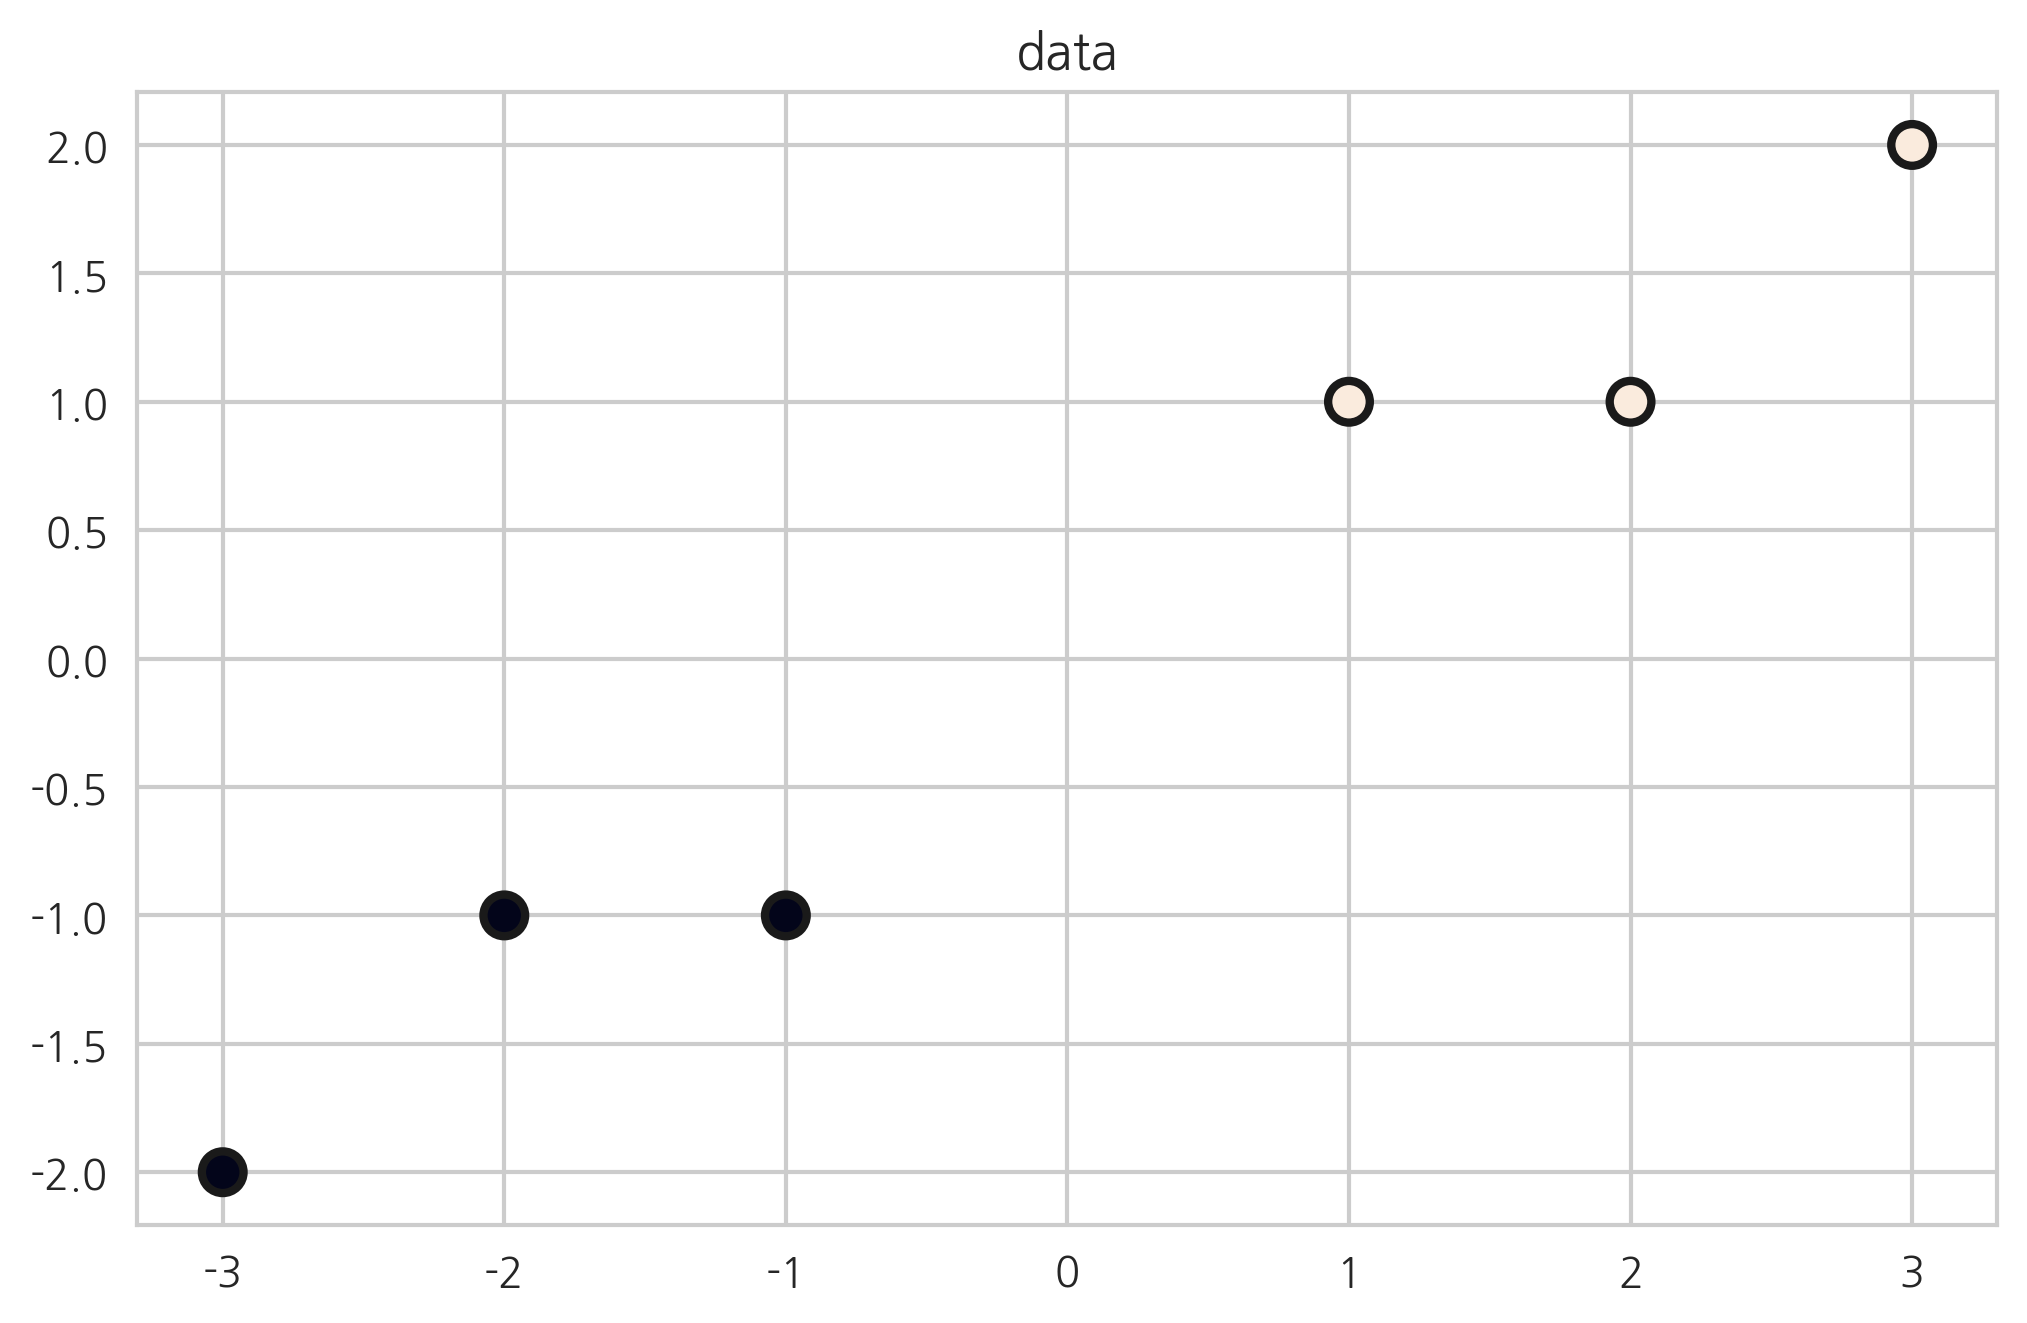

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.title("data")
plt.show()

다음 그림들은 이 분류 문제를 QDA 방법으로 푼 결과이다. 모형의 자세한 내용과 Scikit-Learn 사용법은 추후 설명하기로 하고 일단 다음과 같은 코드를 사용하면 이 분류 문제를 풀 수 있다는 것만 기억하자.

In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X, y)

윗쪽 그림에서 X자로 표시한 것이 테스트 데이터이고, 아래쪽 그램은 이 테스트 데이터가 각 클래스에 속할 조건부 확률을 나타낸다.
만약 테스트 데이터가  두 데이터 클래스의 정중앙에 있다면 이 테스트 데이터가 어느 클래스에 속할지 알 수 없으므로 확률이 0.5로 같은 값을 가진다.

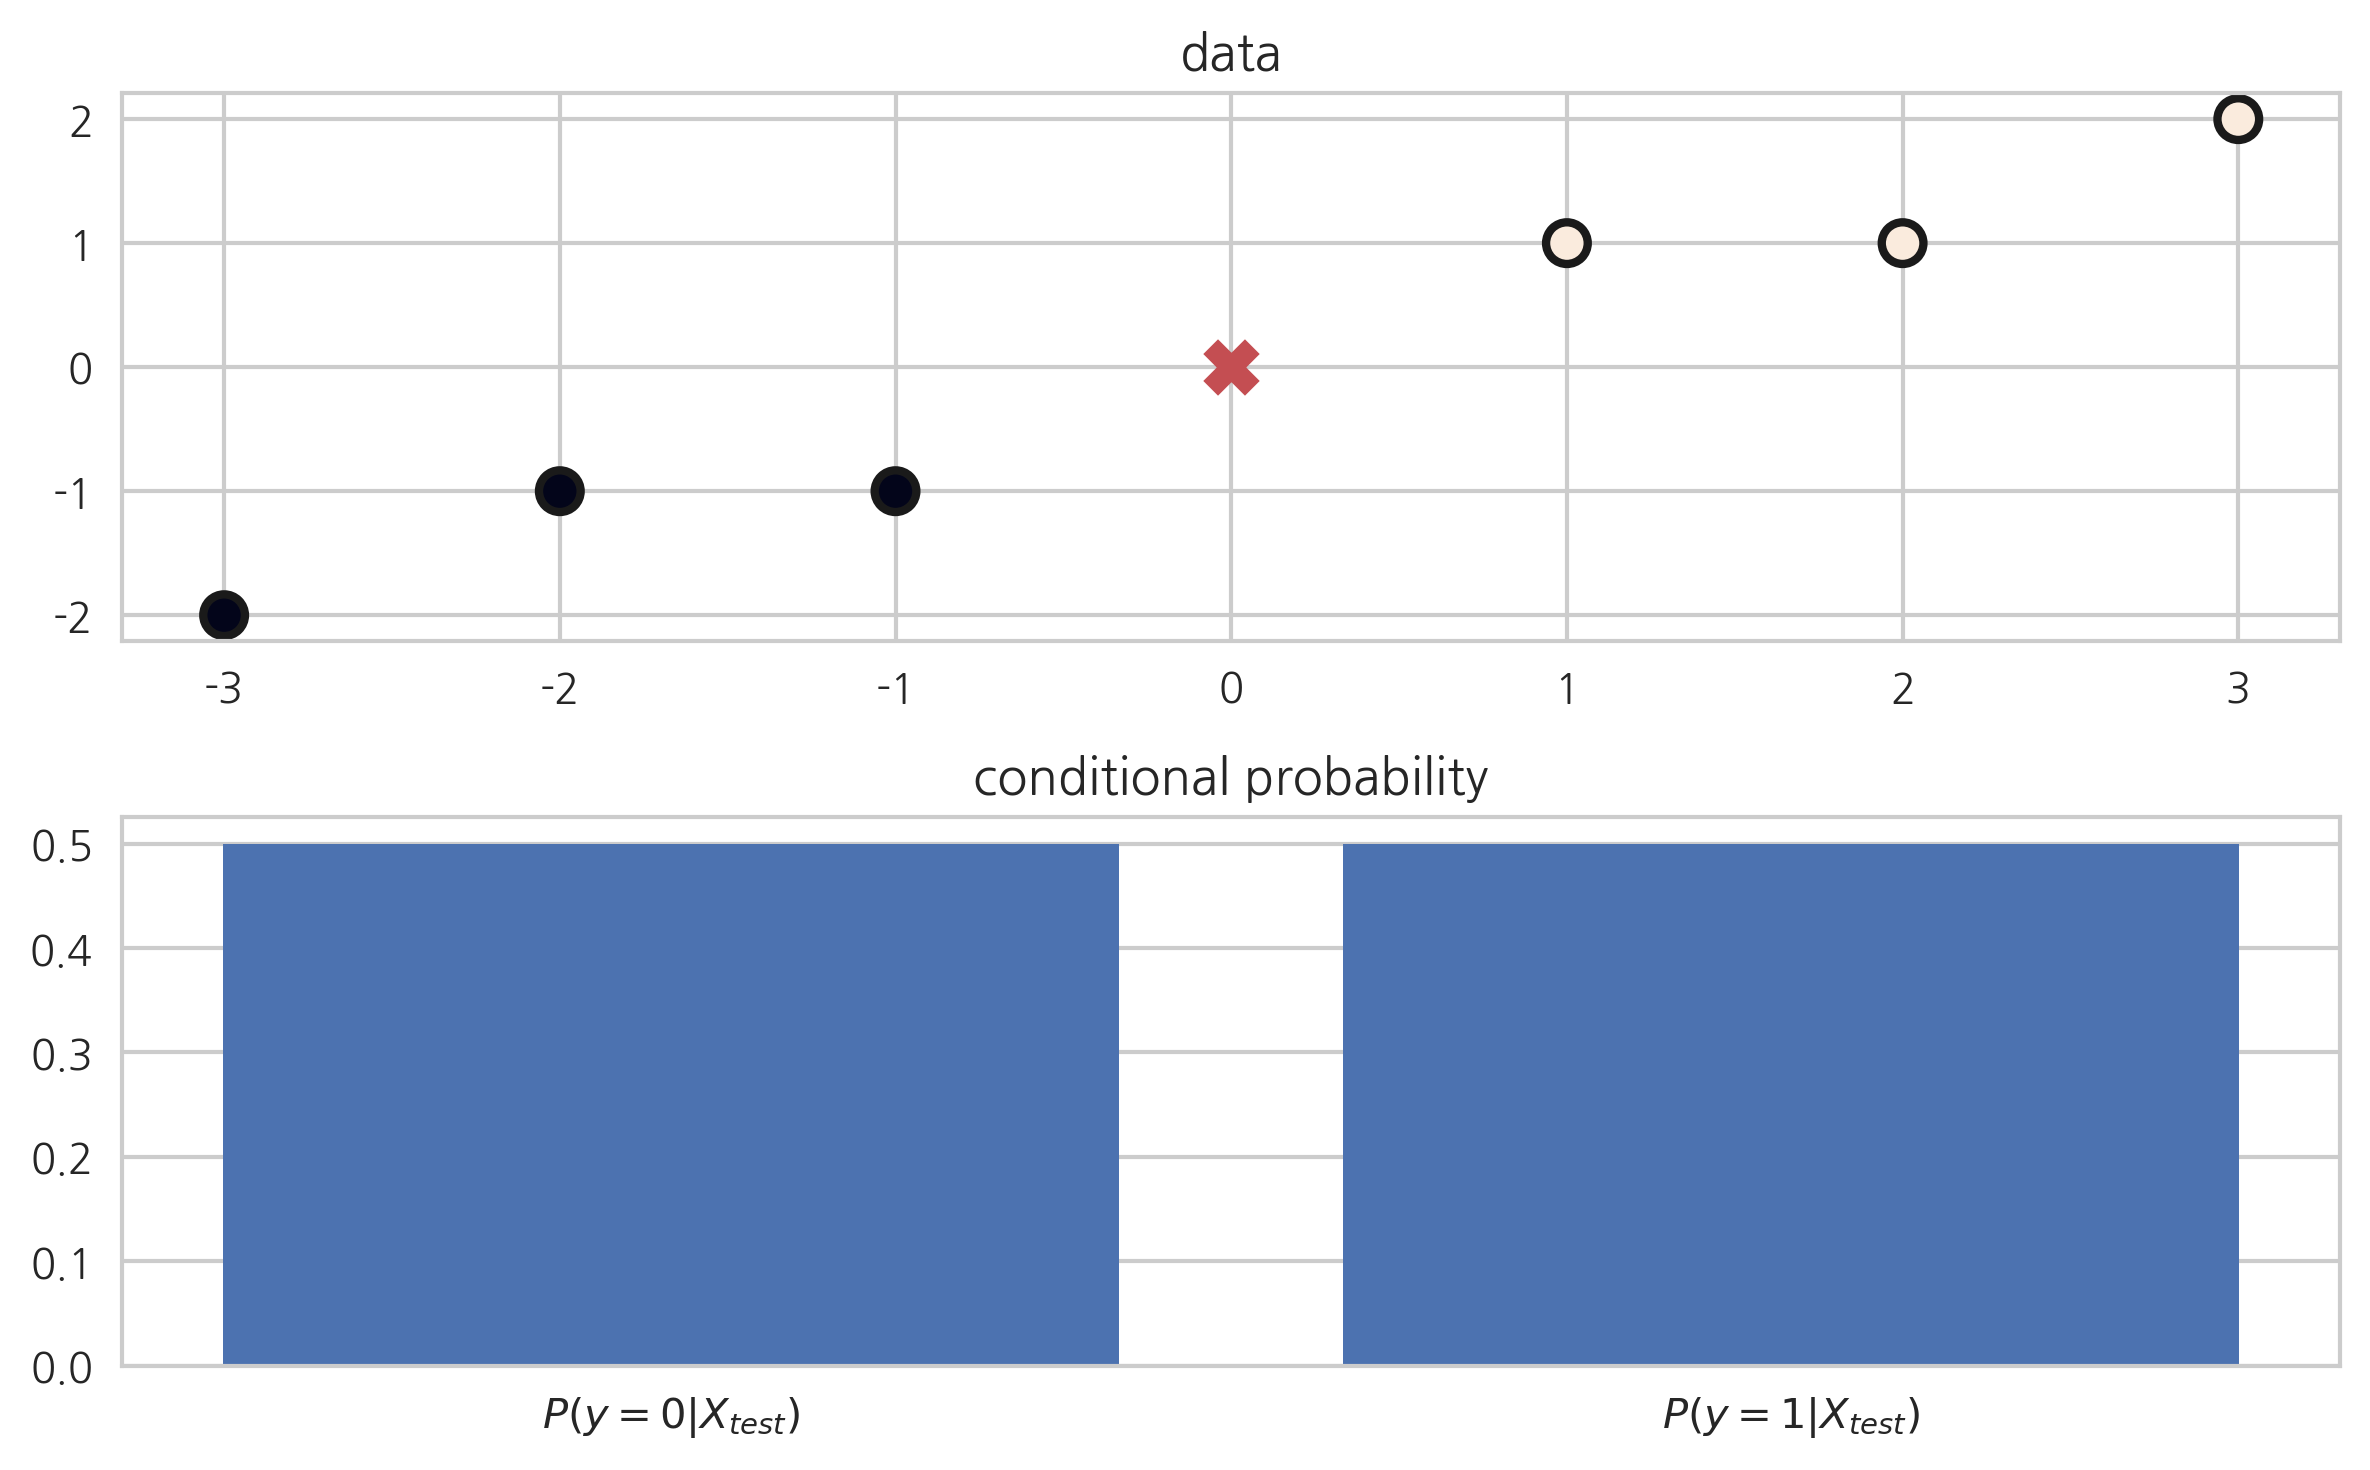

In [4]:
x = [[0, 0]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, edgecolor='k', marker='x', linewidth=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

만약 테스트 데이터가 $y=0$인 클래스에 더 가깝다면 $P(y=0|X_{\text{test}})$가 0.5보다 커지게 된다.

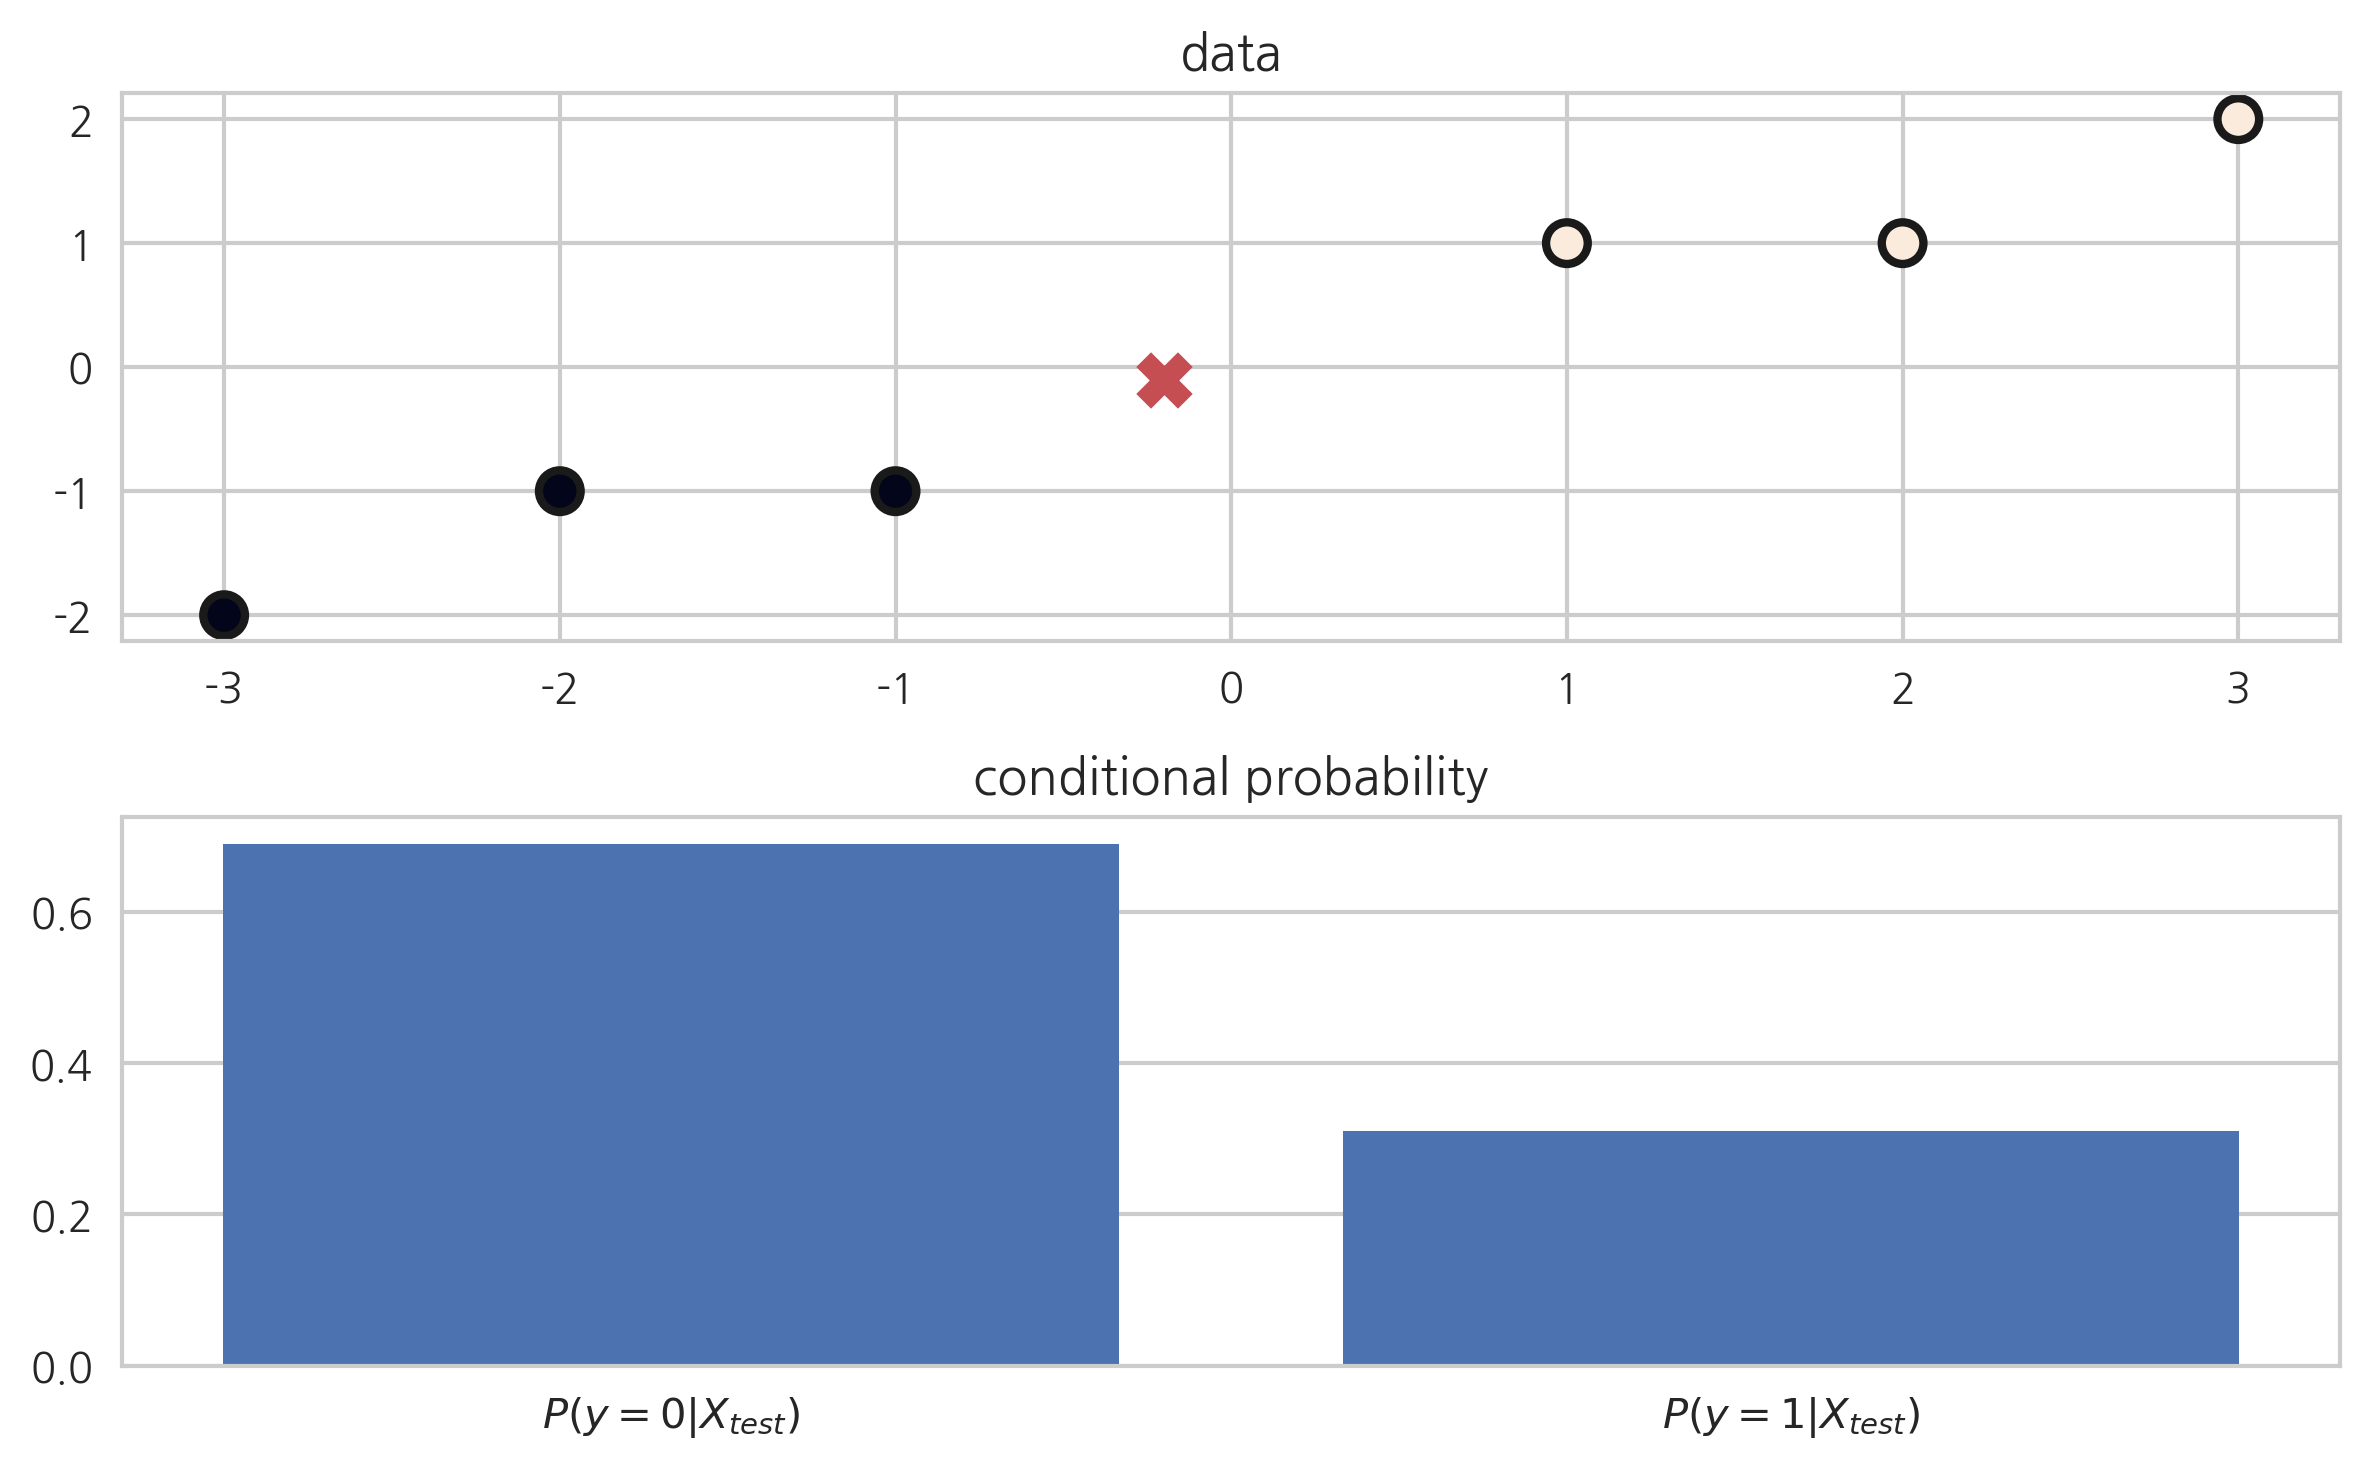

In [5]:
x = [[-0.2, -0.1]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, marker='x', edgecolor='k', linewidth=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

반대로 테스트 데이터가 $y=1$인 클래스에 더 가깝다면 $P(y=1|X_{\text{test}})$가 0.5보다 커지게 된다.

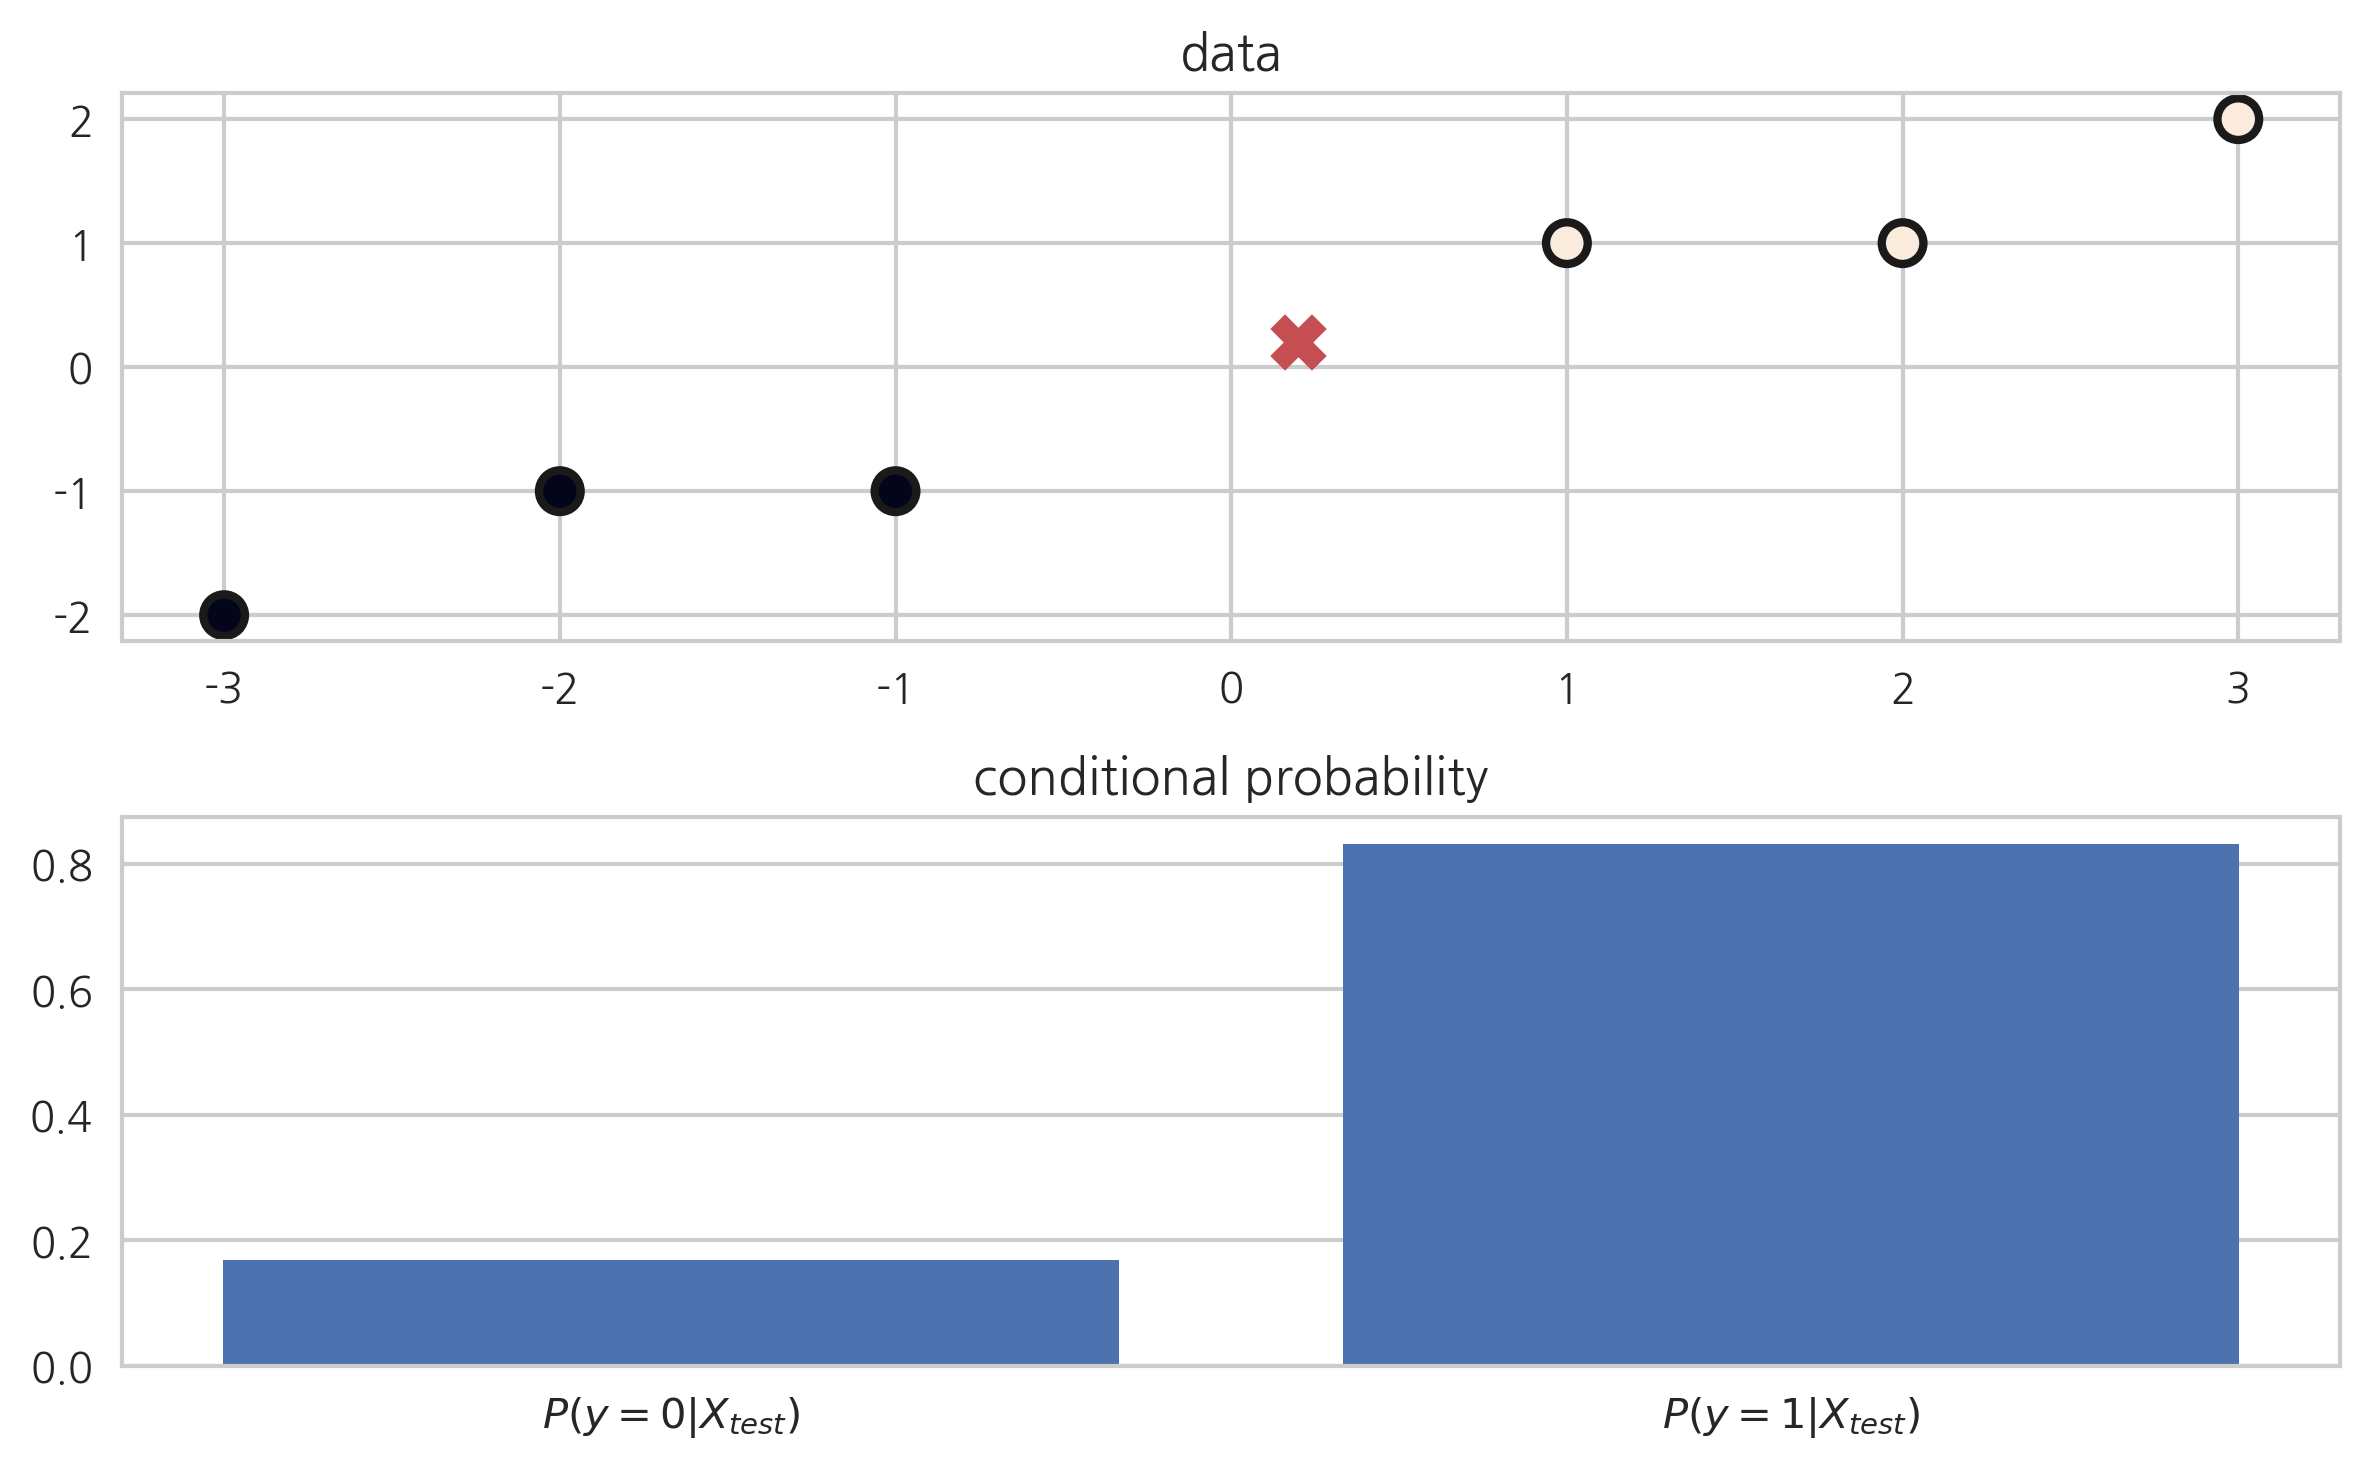

In [6]:
x = [[0.2, 0.2]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, marker='x', edgecolor='k', linewidth=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

### 나이브 베이지안 모형

조건부 확률 기반 생성 모형의 장점 중 하나는 클래스가 3개 이상인 경우에도 바로 적용할 수 있다는 점이다. 나이브 베이지안(Naive Bayesian) 모형도 조건부 확률 모형의 일종이다. 아래는 20 뉴스그룹 분류 문제를 나이브 베이지안 모형을 사용하여 푼 결과이다. 

다음 코드에서는 Scikit-Learn의 `TfidfVectorizer` 전처리기와 `MultinomialNB` 모형을 사용하여 20 뉴스그룹 분류 문제를 풀었다. `TfidfVectorizer` 전처리기는 텍스트 데이터를 정해진 크기의 실수 벡터로 변환한다. `MultinomialNB` 모형은 나이브 베이즈 방법으로 분류 문제를 예측한다. 이 두 클래스 객체는 `Pipeline`을 사용하여 하나의 모형으로 합쳐놓았다. `Pipeline`으로 합쳐진 모형은 일반적인 모형처럼 `fit`, `predict` 등의 메서드를 제공하며 내부의 전처리기의 메소드를 상황에 따라 적절히 호출한다.

In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

news = fetch_20newsgroups(subset="all")
model = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('nb', MultinomialNB()),
])
model.fit(news.data, news.target)

n = 1
x = news.data[n:n + 1]
y = model.predict(x)[0]
print(x[0])
print("=" * 80)
print("Actual Category:", news.target_names[news.target[n]])
print("Predicted Category:", news.target_names[y])

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   

Actual Category: comp.sys.ibm.pc.har

다음 그림은 나이브 베이지안 모형으로 특정한 텍스트 데이터가 20개의 카테고리에 속할 확률을 각각 계산한 것이다. 위쪽 플롯은 확률값이고 아래쪽 플롯은 로그 변환한 값이다.

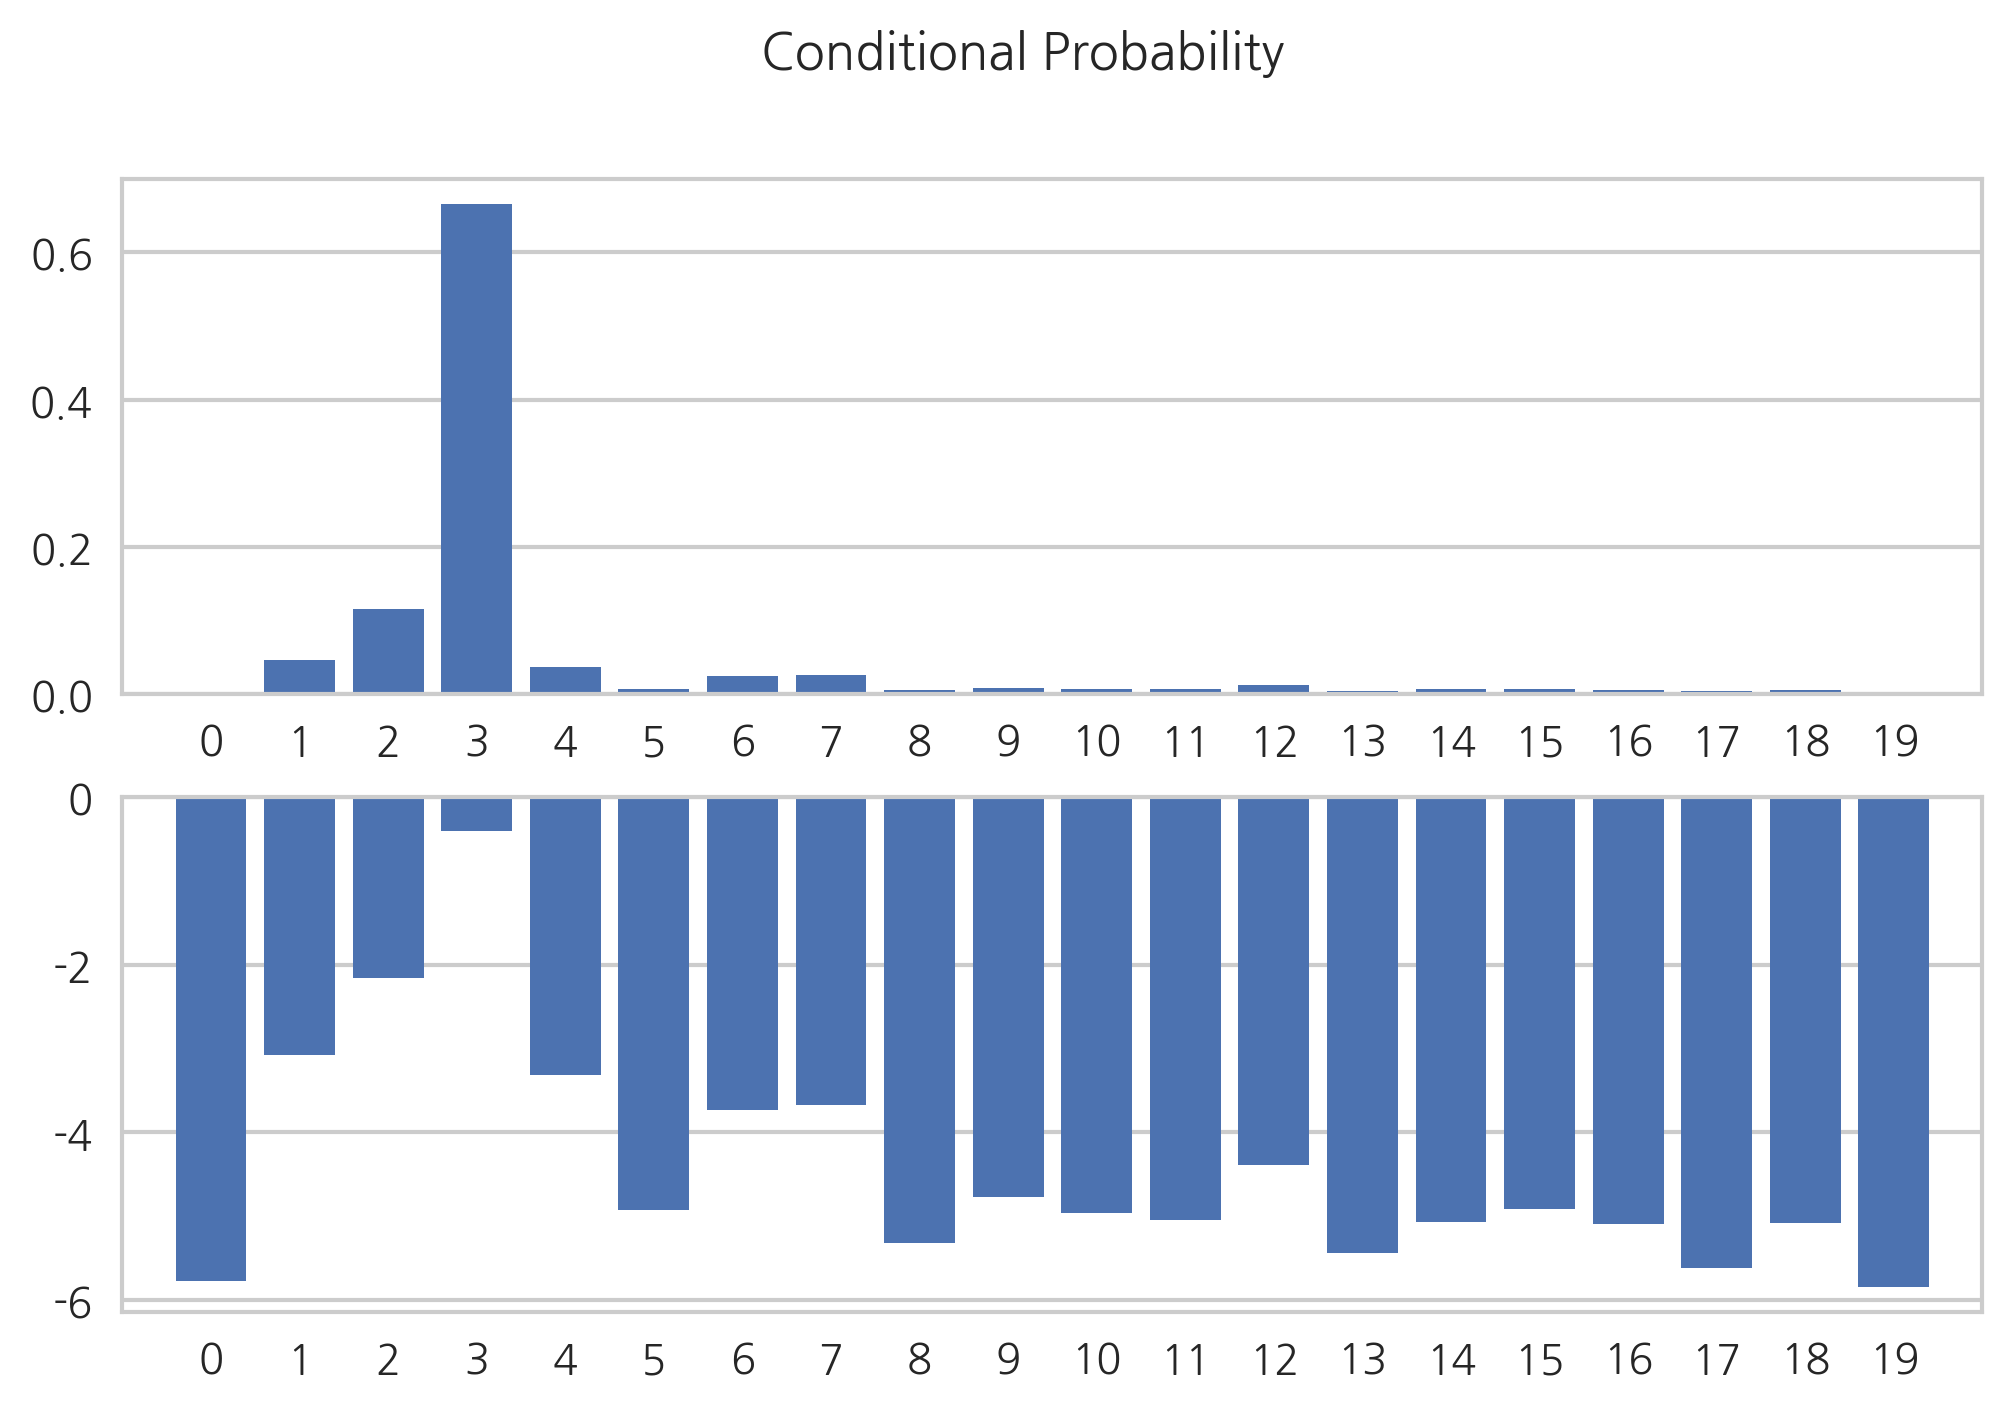

In [8]:
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(x)[0])
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(x)[0])
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.suptitle("Conditional Probability")
plt.show()

### 로지스틱 회귀 모형

위에서 보인 QDA나 나이브 베이지안 방법은 베이즈 정리를 사용하는 조건부 확률 기반 생성 모형이었다. 조건부 확률 기반 생성 모형은 조건부 확률 $p(y \mid x)$를 구하기 위해 우선 likelihood $p(x \mid y)$를 구하고 베이즈 정리를 사용하여 조건부 확률을 계산한다.

하지만 확률론적 판별 모형(probabilistic discriminative model)은 조건부 확률 $p(y=C_1 \mid x)$이 바로 어떤 함수 $f(x)$로 표시될 수 있다고 가정하고 그 함수를 직접 찾아내는 방법이다. 

$$ p(y = C_1 \mid x) = f(x) $$

로지스틱 회귀 모형은 확률론적 판별 모형에 속한다.

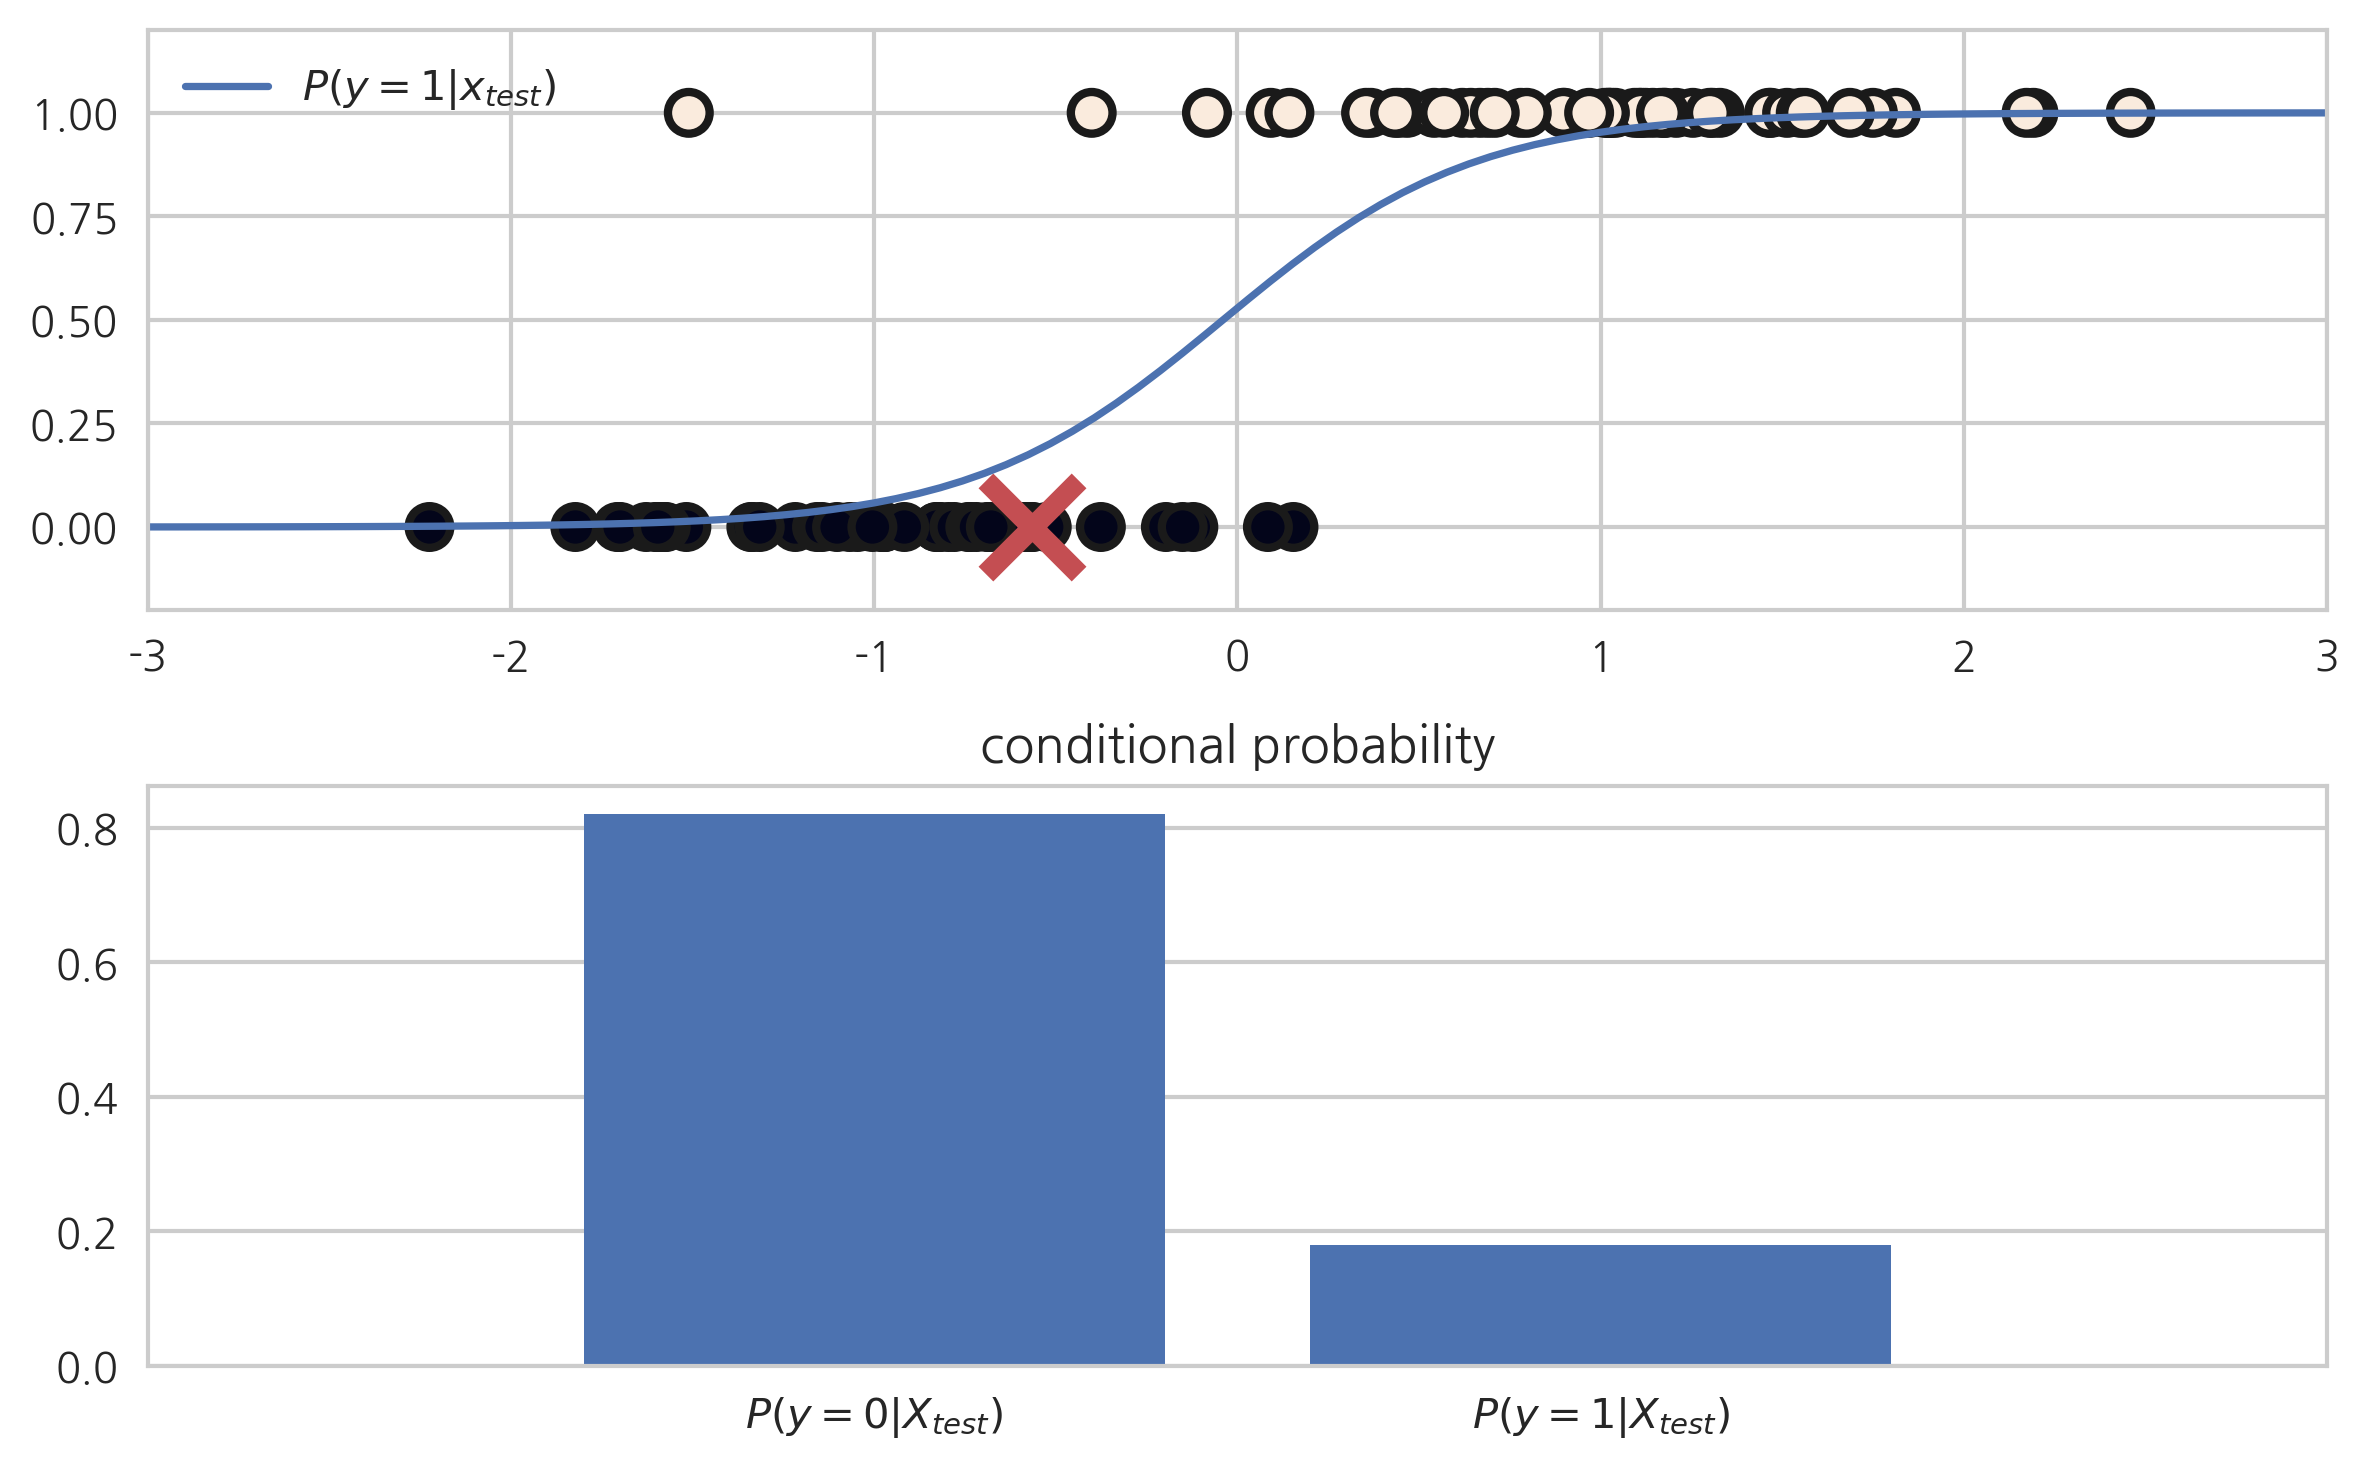

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]
# prob = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(X0[0], model.predict(X0[:1]), marker='x', s=500, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(X0[:1])[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.title("conditional probability")
plt.tight_layout()
plt.show()

## 판별 함수 기반 모형

또 다른 분류 방법은 동일한 클래스가 모여 있는 영역과 그 영역을 나누는 경계면(boundary plane)을 정의하는 것이다.
이 경계면은 경계면으로부터의 거리를 계산하는 $f(x)$ 형태의 함수인 **판별 함수(discriminant function)**로 정의된다. 판별 함수의 값의 부호에 따라 클래스가 나뉘어진다.

$$ \text{boundary plane}: \;\; f(x) = 0 $$

$$ \text{class 1}: \;\; f(x) > 0 $$

$$ \text{class 0}: \;\; f(x) < 0 $$

Scikit-Learn 에서 분별 함수 기반의 모형은 분별 함수 값을 출력하는 `decision_function` 메서드를 제공한다.

### 퍼셉트론

퍼셉트론(Perceptron)은 가장 단순한 판별 함수 기반 모형이다. 다음 그림과 같이 직선이 경계선(boundary line)으로 데이터 영역을 나눈다.

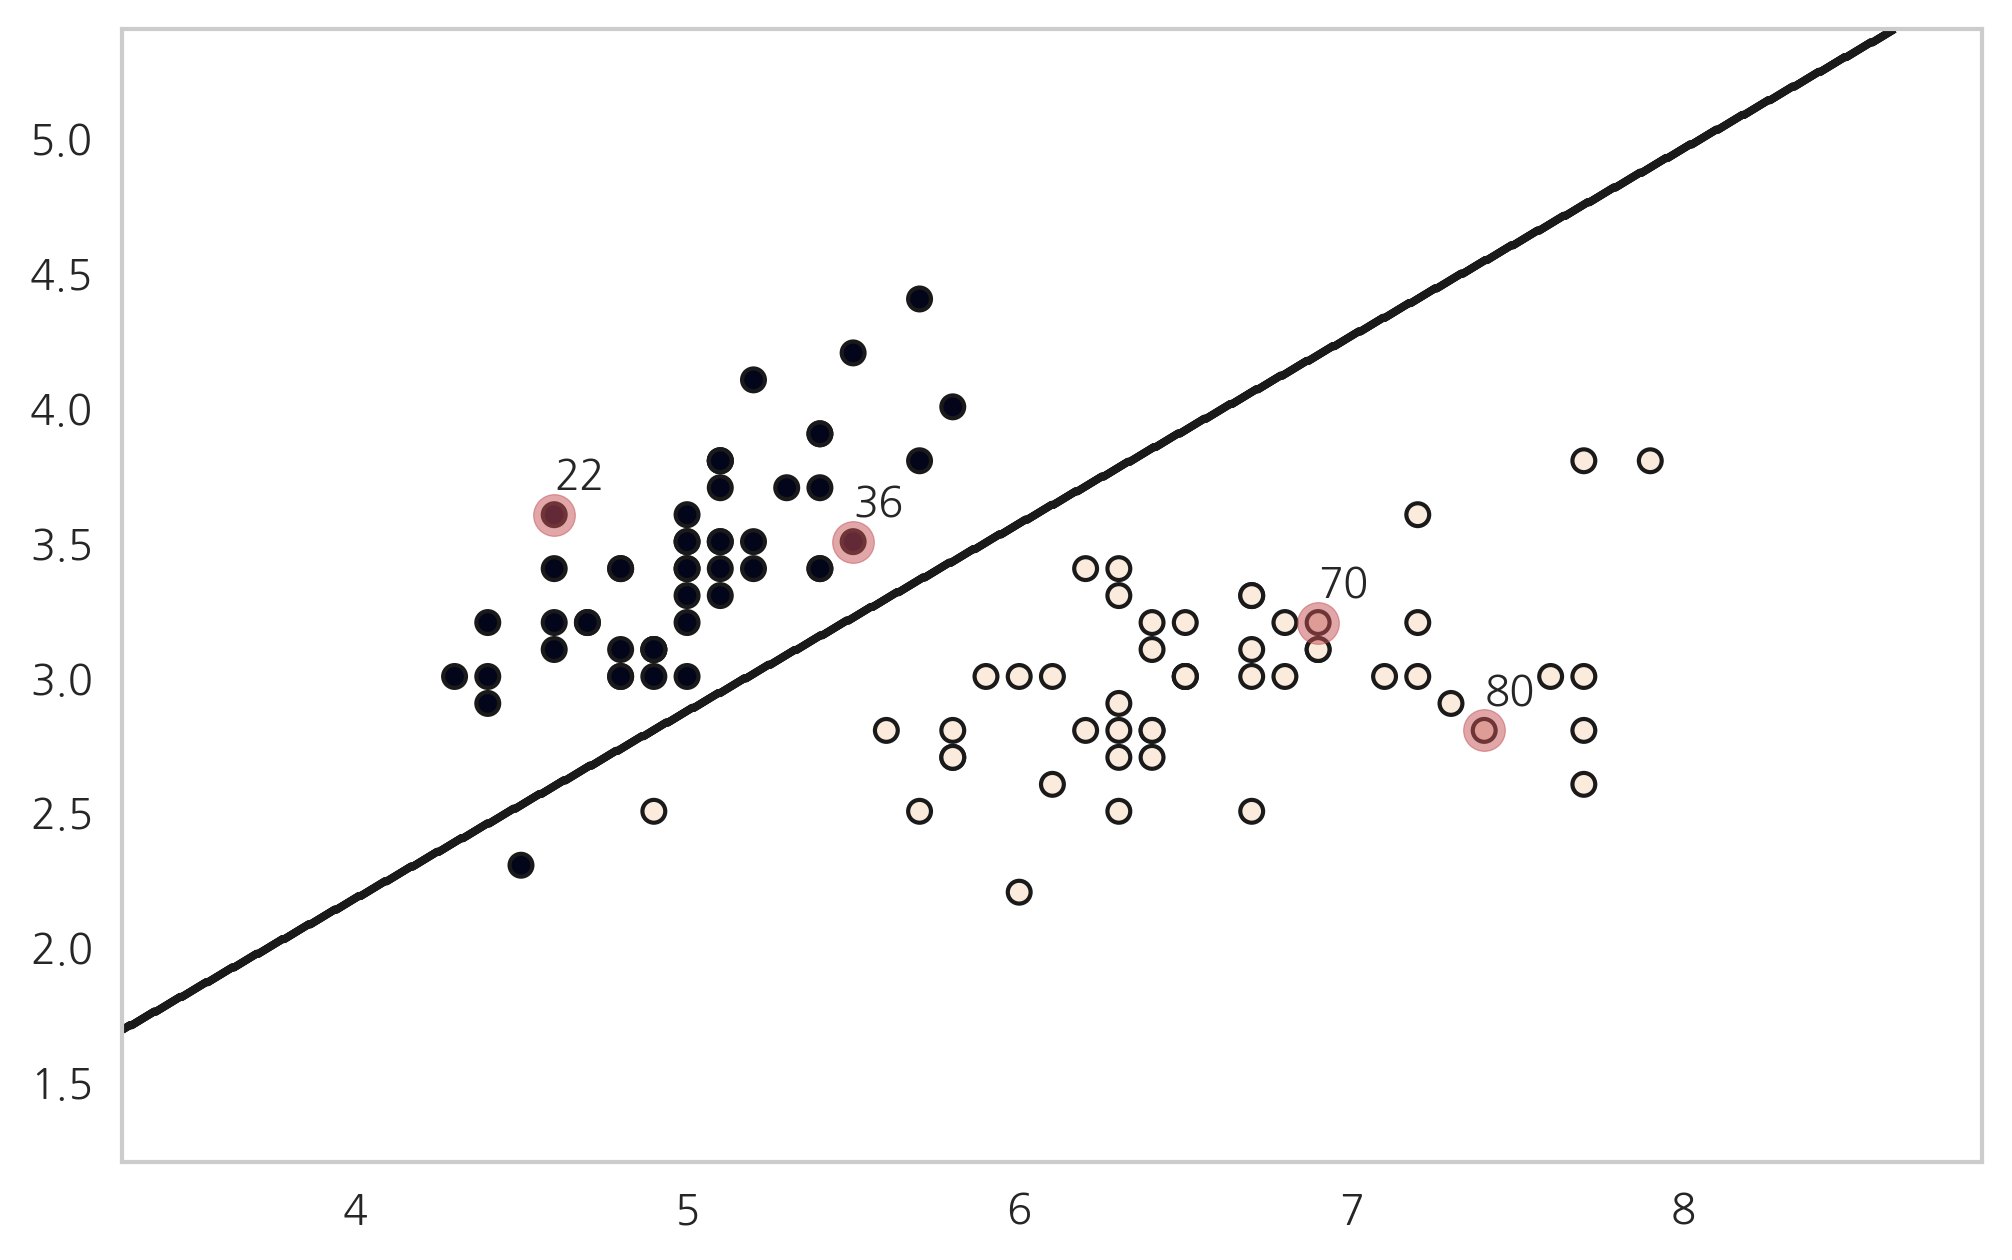

In [10]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

model = Perceptron(max_iter=100, eta0=0.1, random_state=1).fit(X, y)
XX_min, XX_max = X[:, 0].min() - 1, X[:, 0].max() + 1
YY_min, YY_max = X[:, 1].min() - 1, X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
plt.contour(XX, YY, ZZ, colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', linewidth=1)

idx = [22, 36, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c='r', s=100, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1] + 0.1))
plt.grid(False)
plt.show()

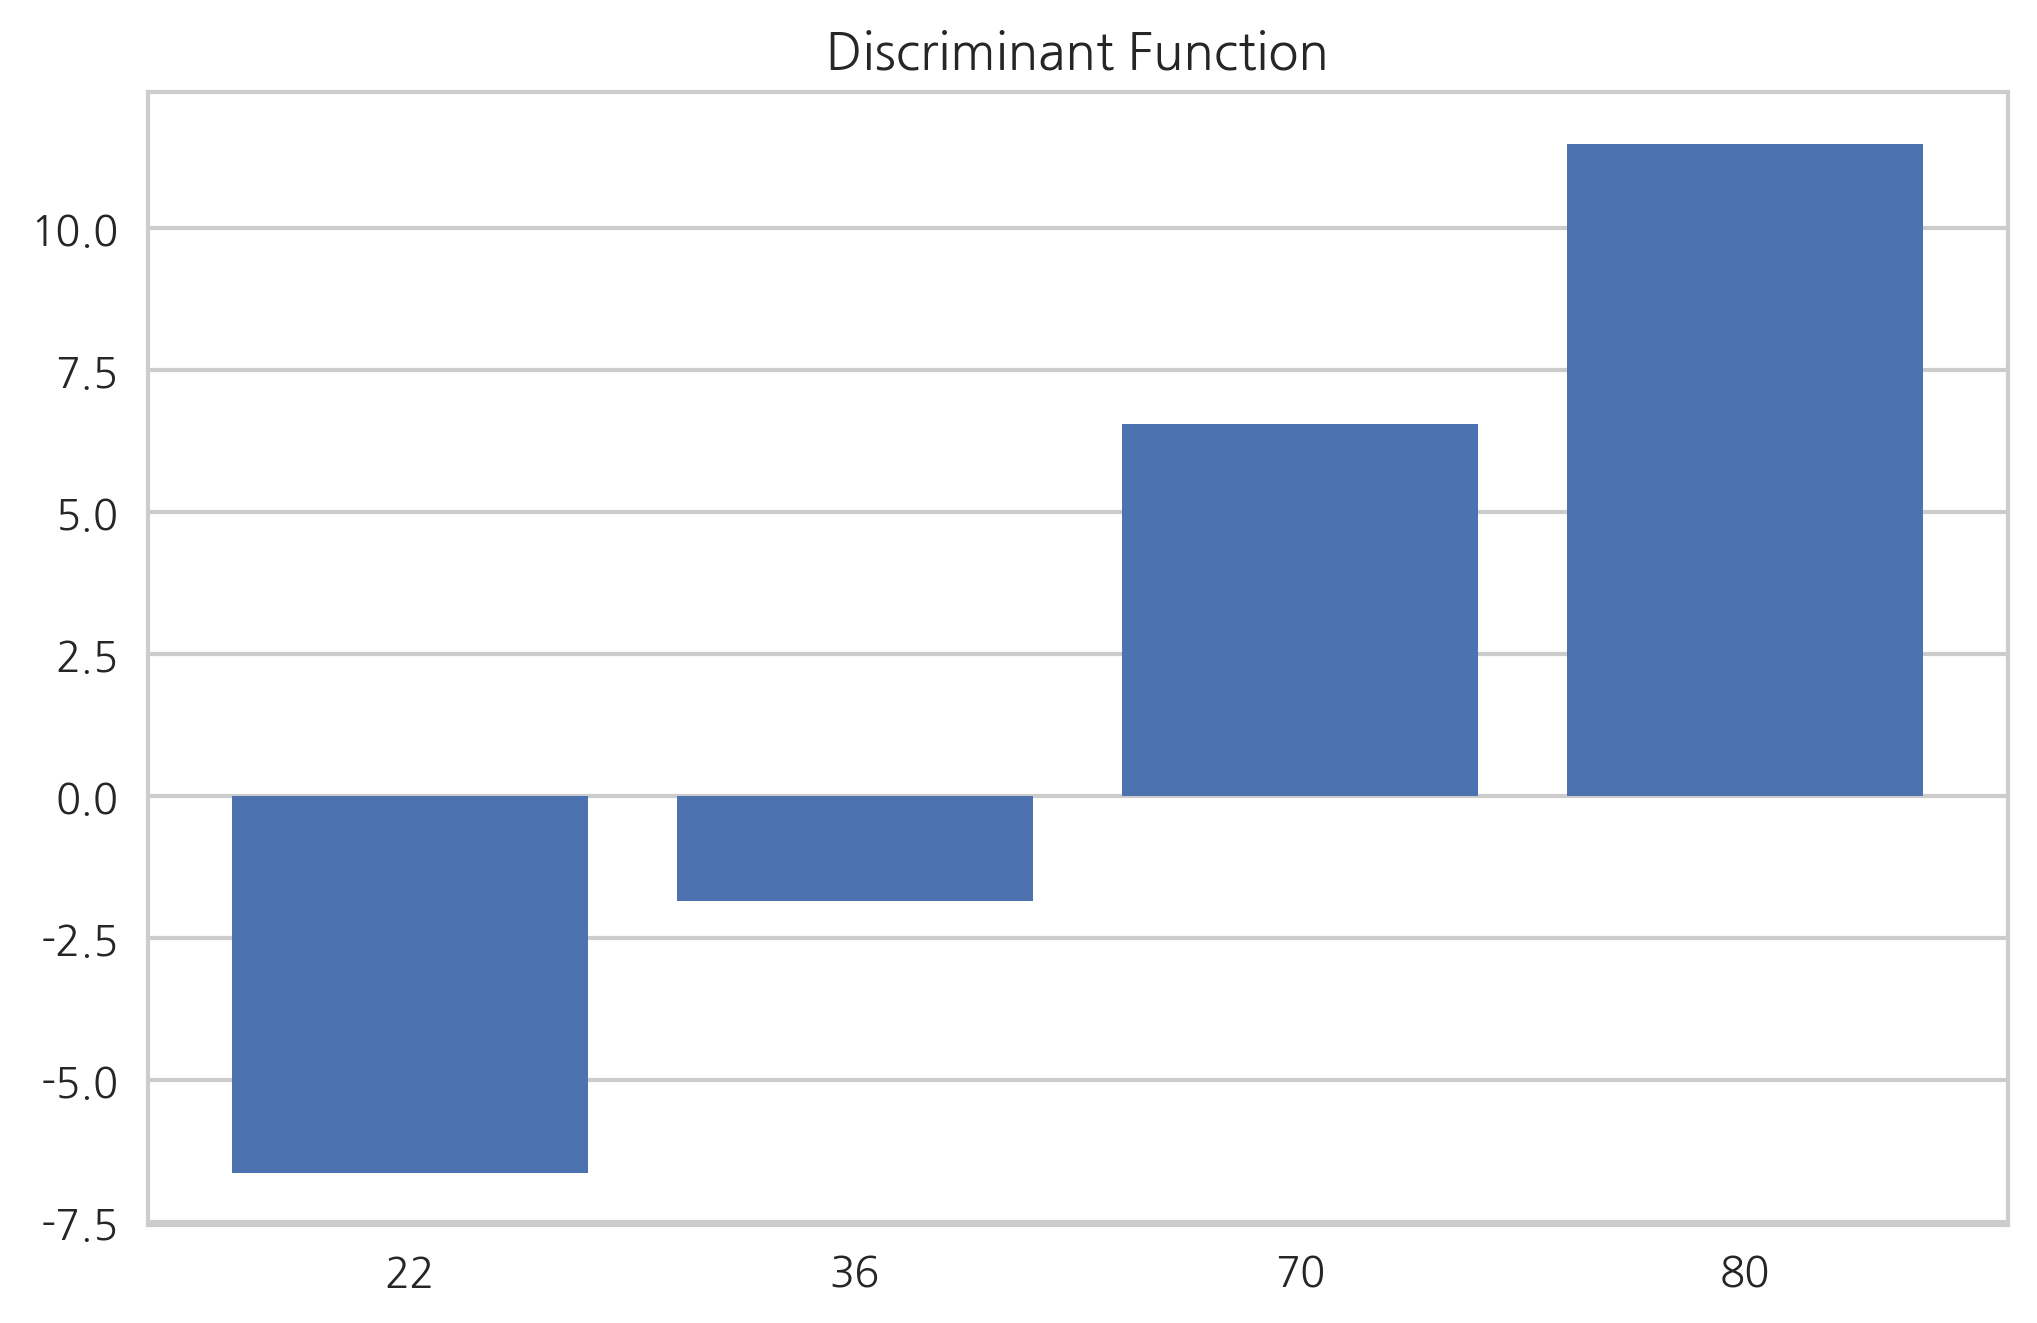

In [11]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title("Discriminant Function")
plt.show()

만약 데이터의 차원이 3차원이라면 다음과 같이 경계면(boundary surface)을 가지게 된다. 이러한 경계면이나 경계선을 의사결정 하이퍼 플레인(decision hyperplane)이라고 한다.

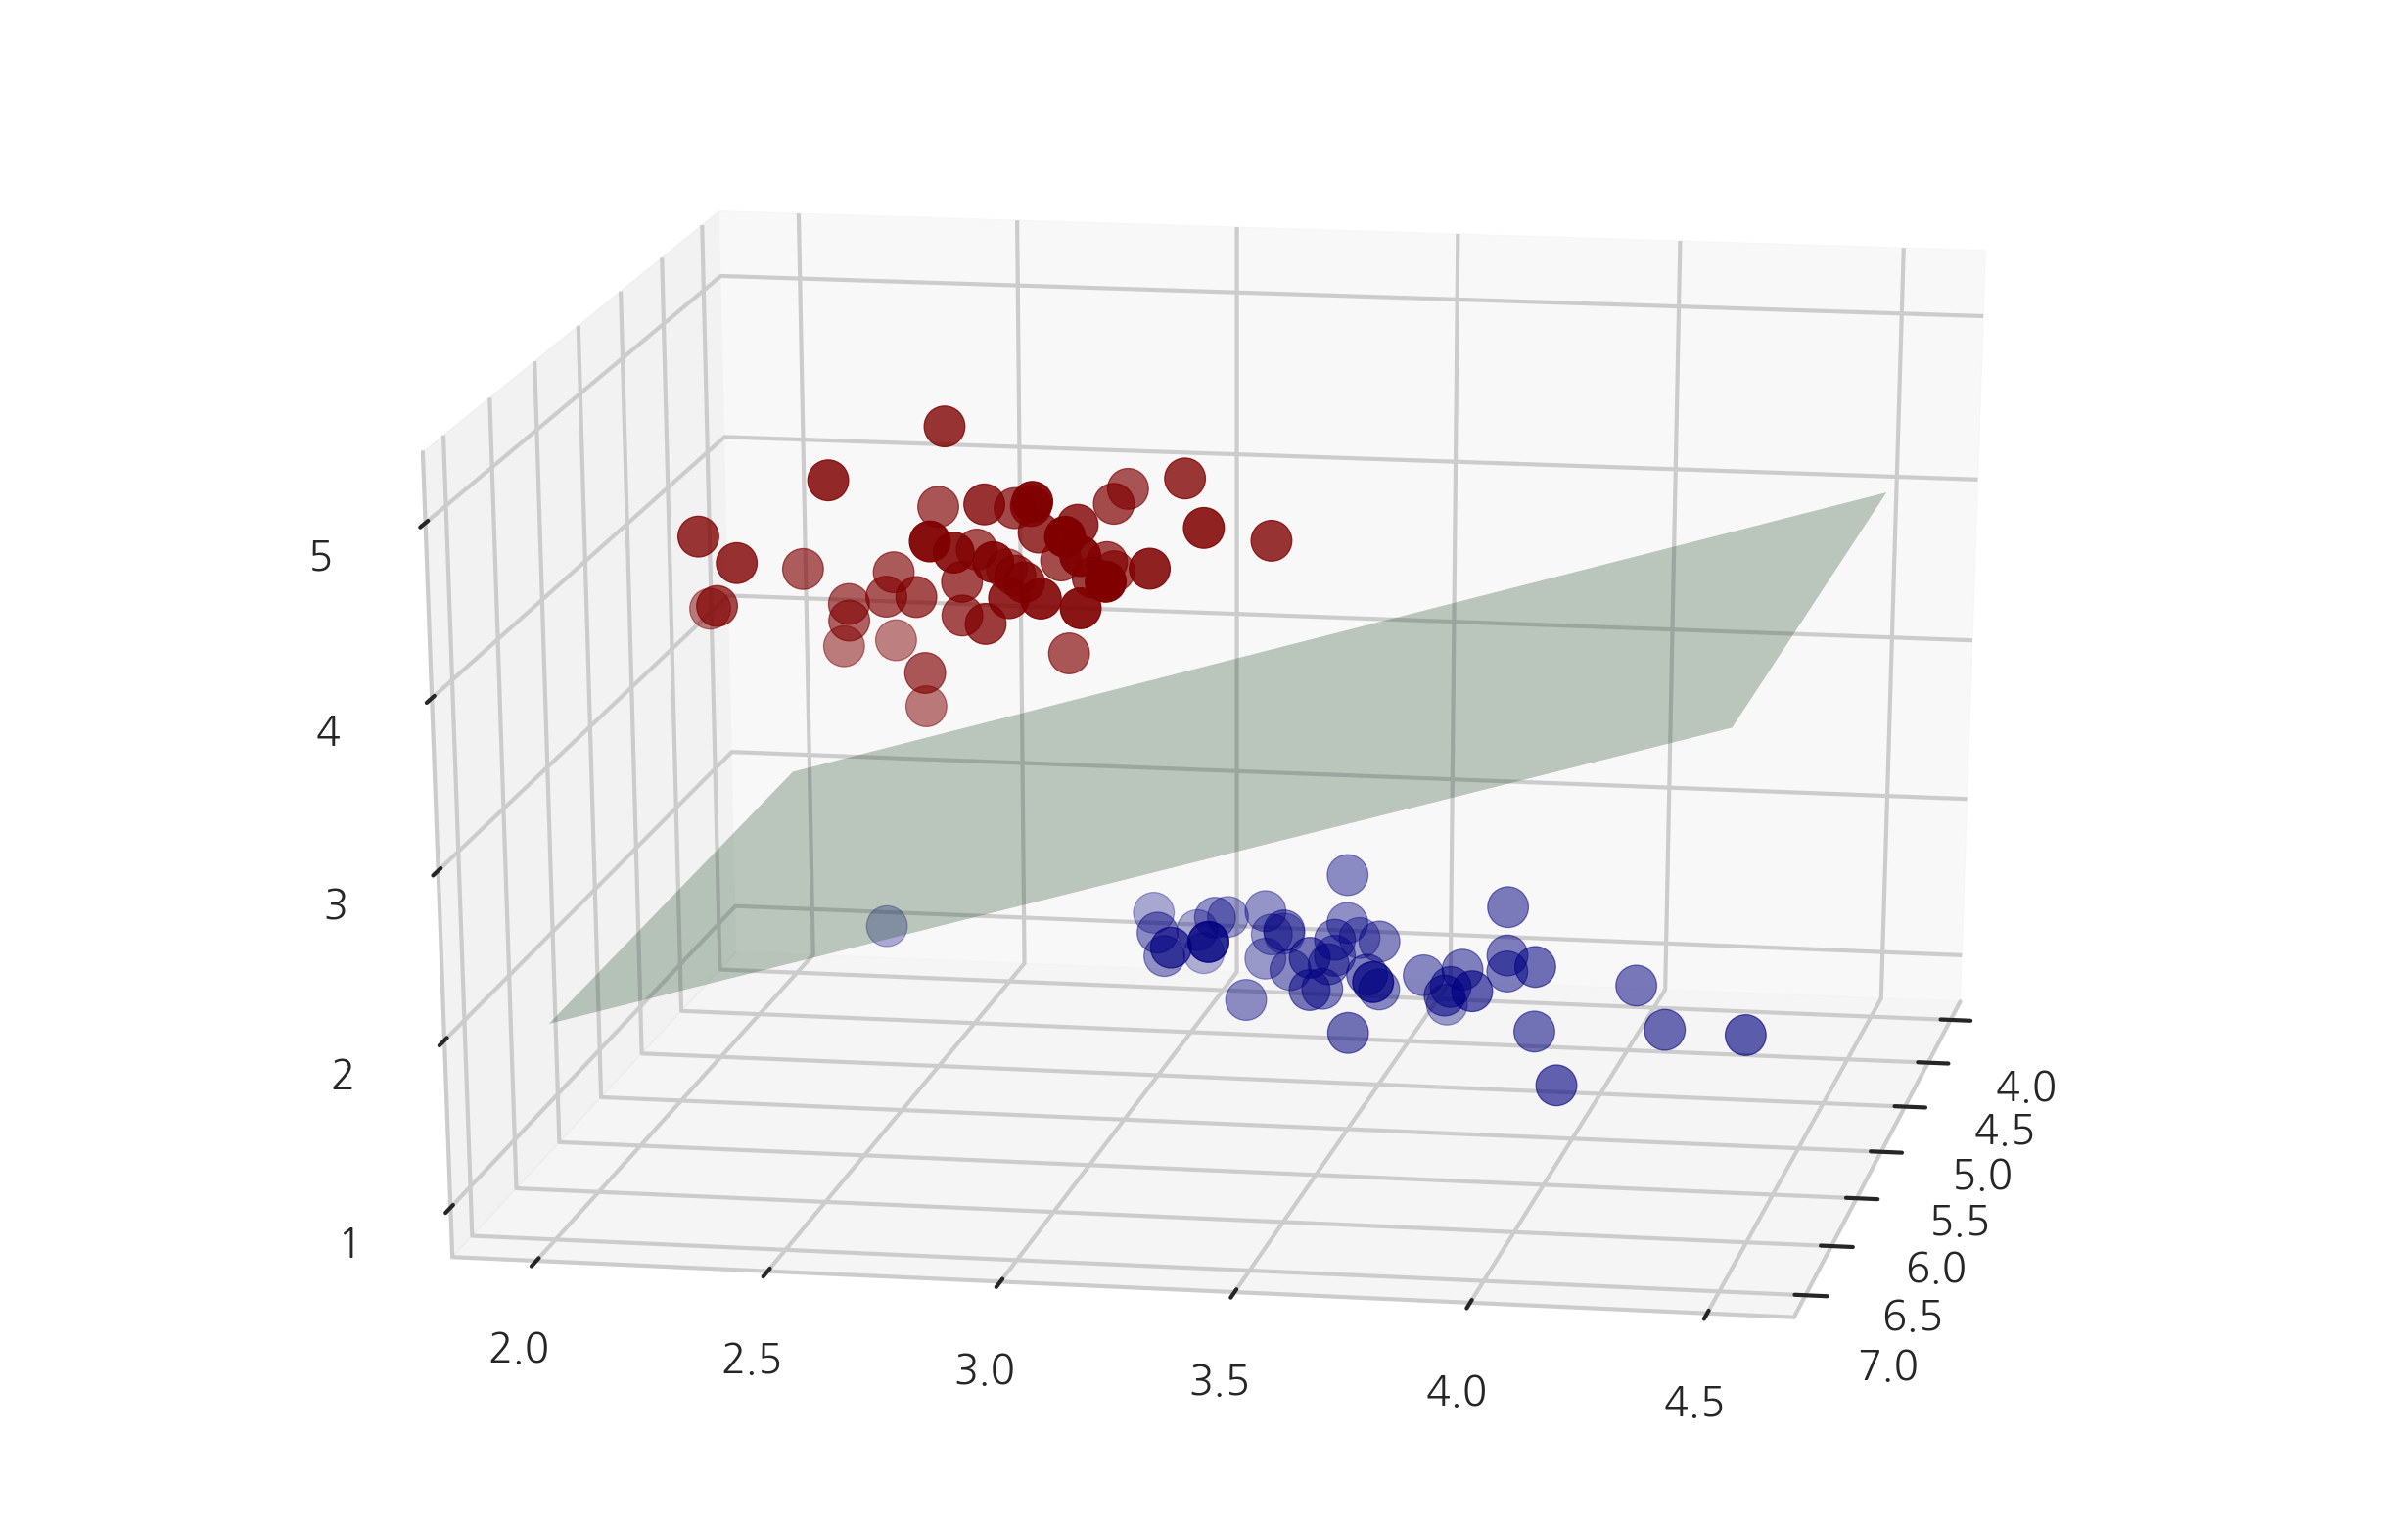

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
idx = np.logical_or(iris.target == 0, iris.target == 1)
X = iris.data[idx, :3]
y = iris.target[idx]

fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=10)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='o', s=100, cmap=mpl.cm.jet);
ax.plot_surface(np.array([[4, 4], [7, 7]]), np.array([[2, 4.5], [2, 4.5]]),
                np.array([[2, 4], [2, 4]]), color='g', alpha=.3)
plt.show()

### 커널 SVM

커널 SVM(Kernel Support Vector Machine)을 사용하면 다음과 같이 복잡한 형태의 경계선을 생성할 수도 있다.

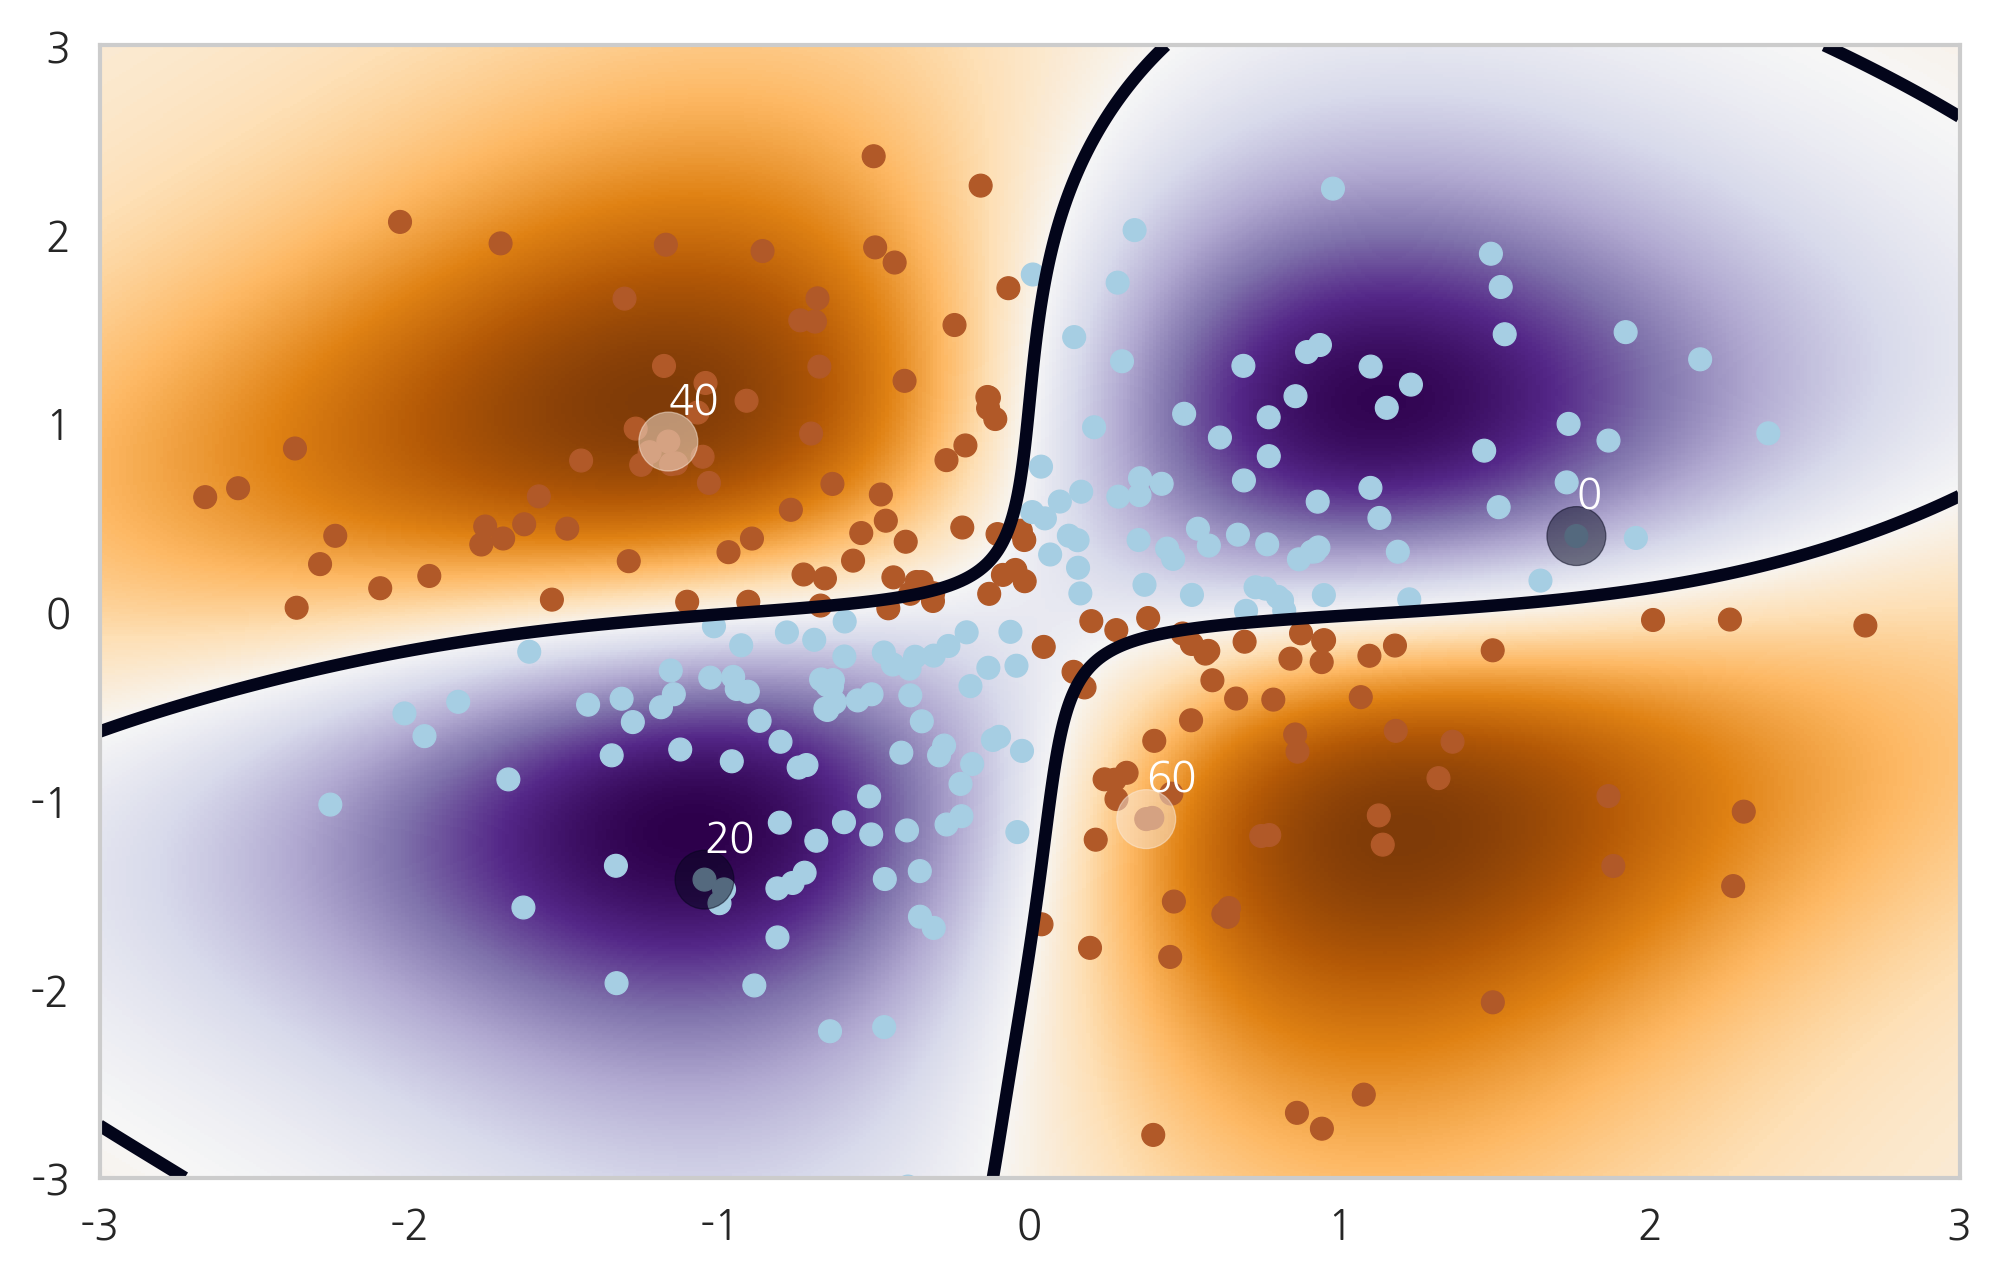

In [13]:
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

model = svm.NuSVC().fit(X, Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3, linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.show()

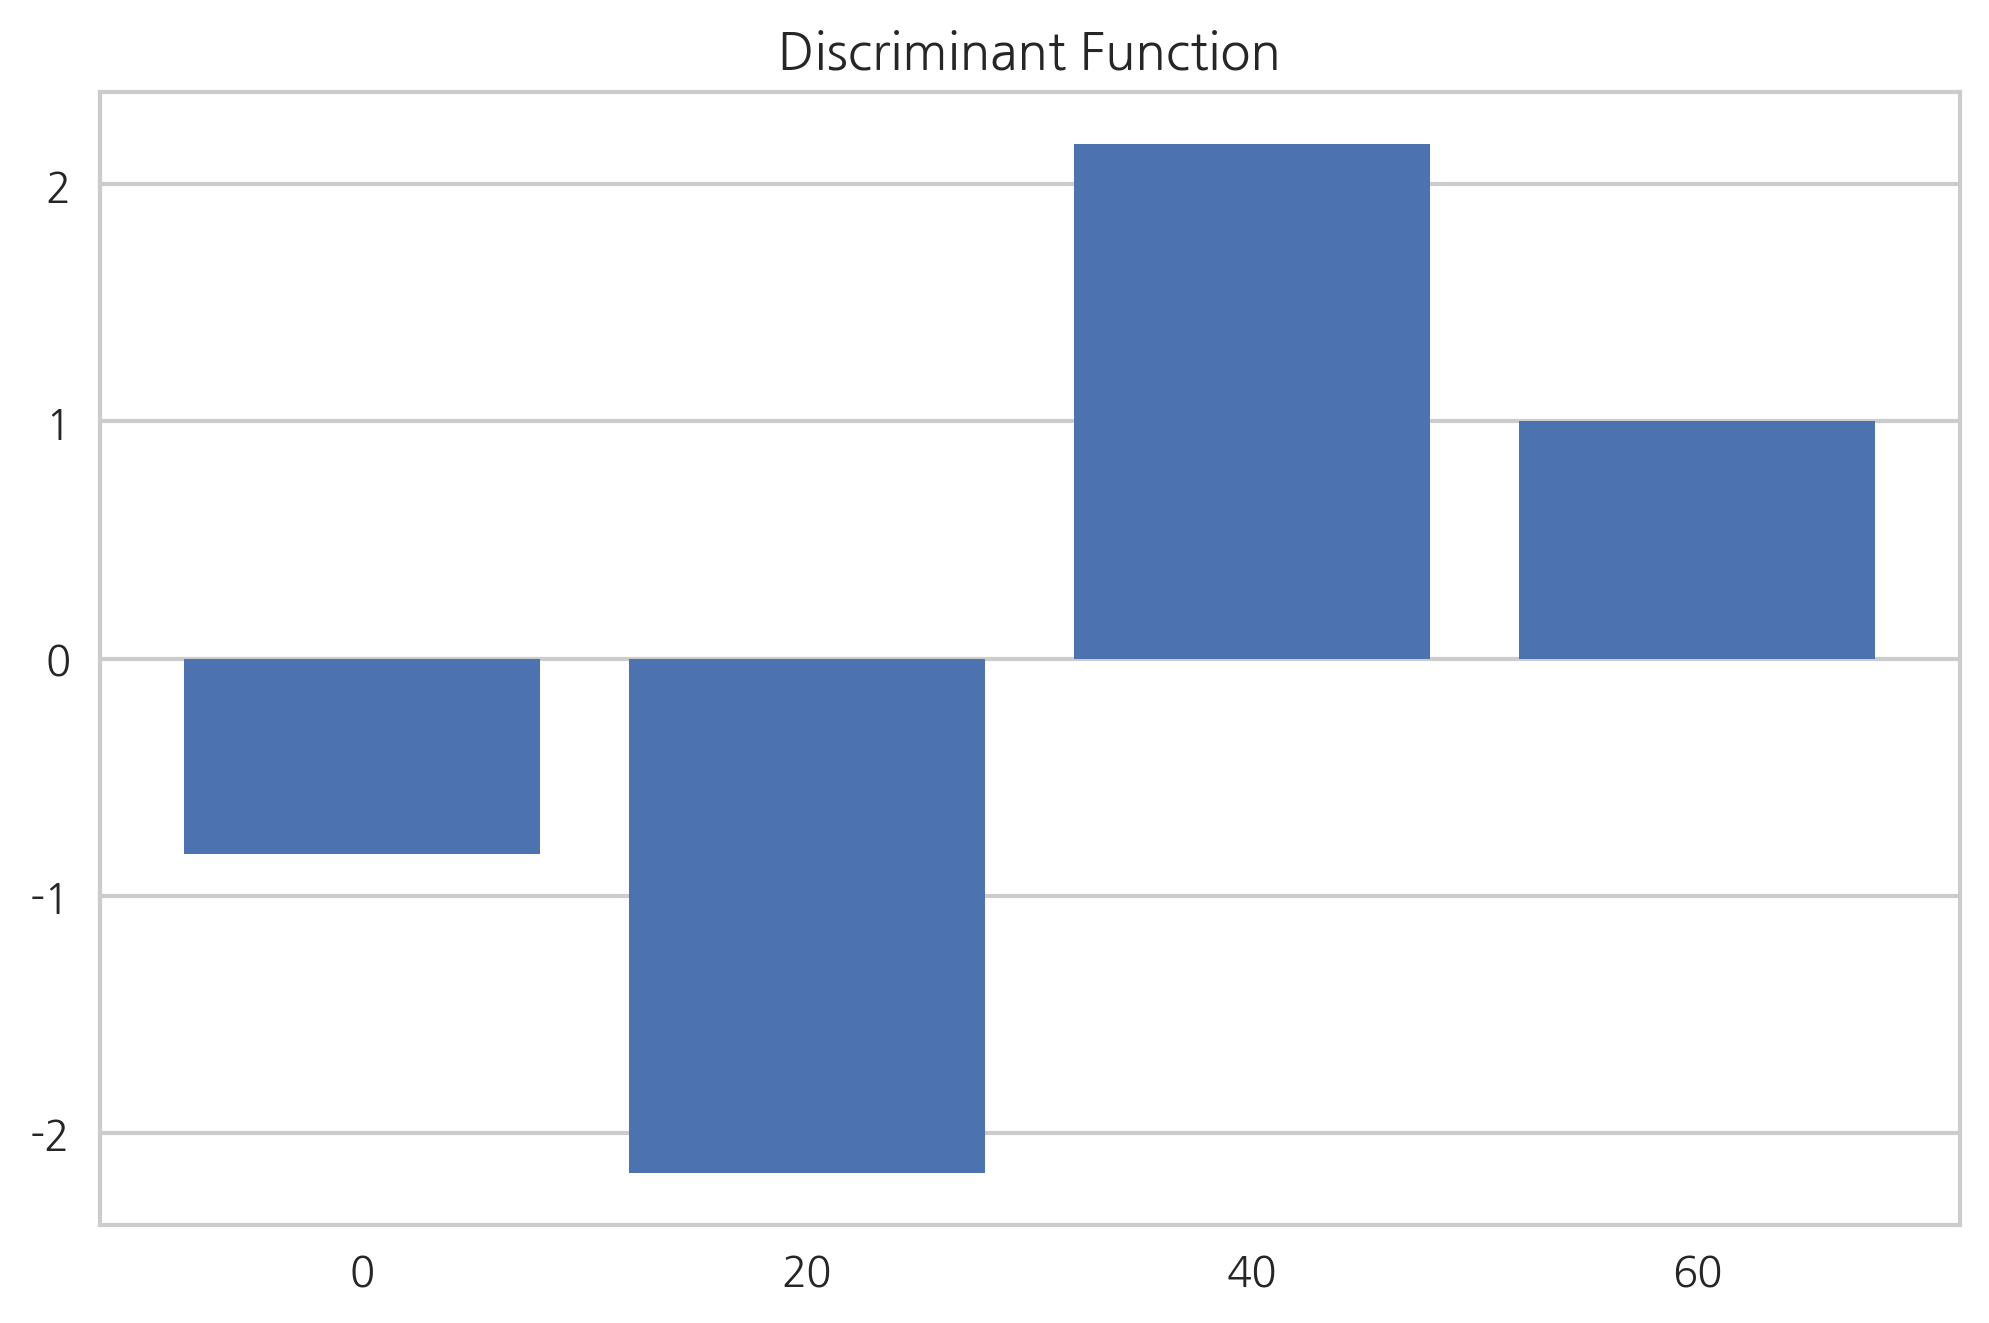

In [14]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title("Discriminant Function")
plt.show()